# Network Topology Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx
import pickle
import random
import igraph as ig

In [3]:
df = pd.read_csv("products_cleaned_engineered.csv")

df

id                                              title group  \
0            1            Patterns of Preaching: A Sermon Sampler  Book   
1            2                         Candlemas: Feast of Flames  Book   
2            3   World War II Allied Fighter Planes Trading Cards  Book   
3            4  Life Application Bible Commentary: 1 and 2 Tim...  Book   
4            5    Prayers That Avail Much for Business: Executive  Book   
...        ...                                                ...   ...   
259162  262104                                      Satchel Paige  Book   
259163  262106  Japanese for Busy People: English Teacher's Ma...  Book   
259164  262107                                       Halloween II   DVD   
259165  262108                               Book Of Vision Quest  Book   
259166  262109  Favorite Russian Fairy Tales (Dover Children's...  Book   

        salesrank  review_cnt  downloads  rating  in_degree  out_degree  
0        396585.0           2          2     5.0          0           4  
1        168596.0          12         12     4.5          1           4  
2       1270652.0           1          1     5.0          0           5  
3        631289.0           1          1     4.0         24           5  
4        455160.0           0          0     0.0         53           5  
...           ...         ...        ...     ...        ...         ...  
259162    36449.0           3          3     4.5          1           4  
259163   588715.0           0          0     0.0          1           5  
259164    31245.0         320        320     4.0          2           4  
259165   255390.0           4          4     4.0          1           5  
259166   250544.0           2          2     5.0          1           5  

[259167 rows x 9 columns]

In [4]:
pickle_file_path = 'amazon_copurchase_graph.pickle'
with open(pickle_file_path, 'rb') as f:
    loaded_graph = pickle.load(f)

print(loaded_graph)

DiGraph with 259102 nodes and 1207337 edges


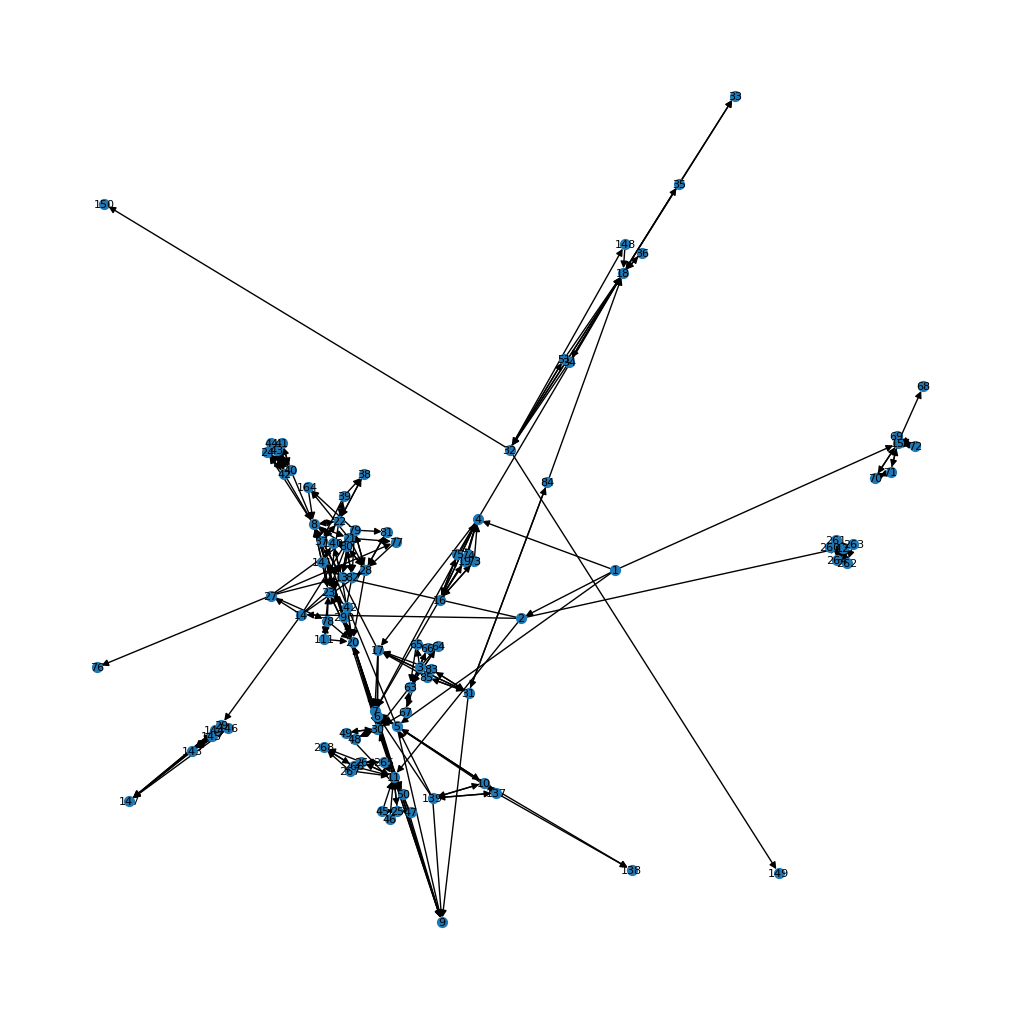

In [5]:
subgraph_nodes = list(loaded_graph.nodes())[:100]
subgraph = loaded_graph.subgraph(subgraph_nodes)

plt.figure(figsize=(10, 10))
nx.draw(subgraph, with_labels=True, node_size=50, font_size=8)
plt.show()

### Degree Distribution

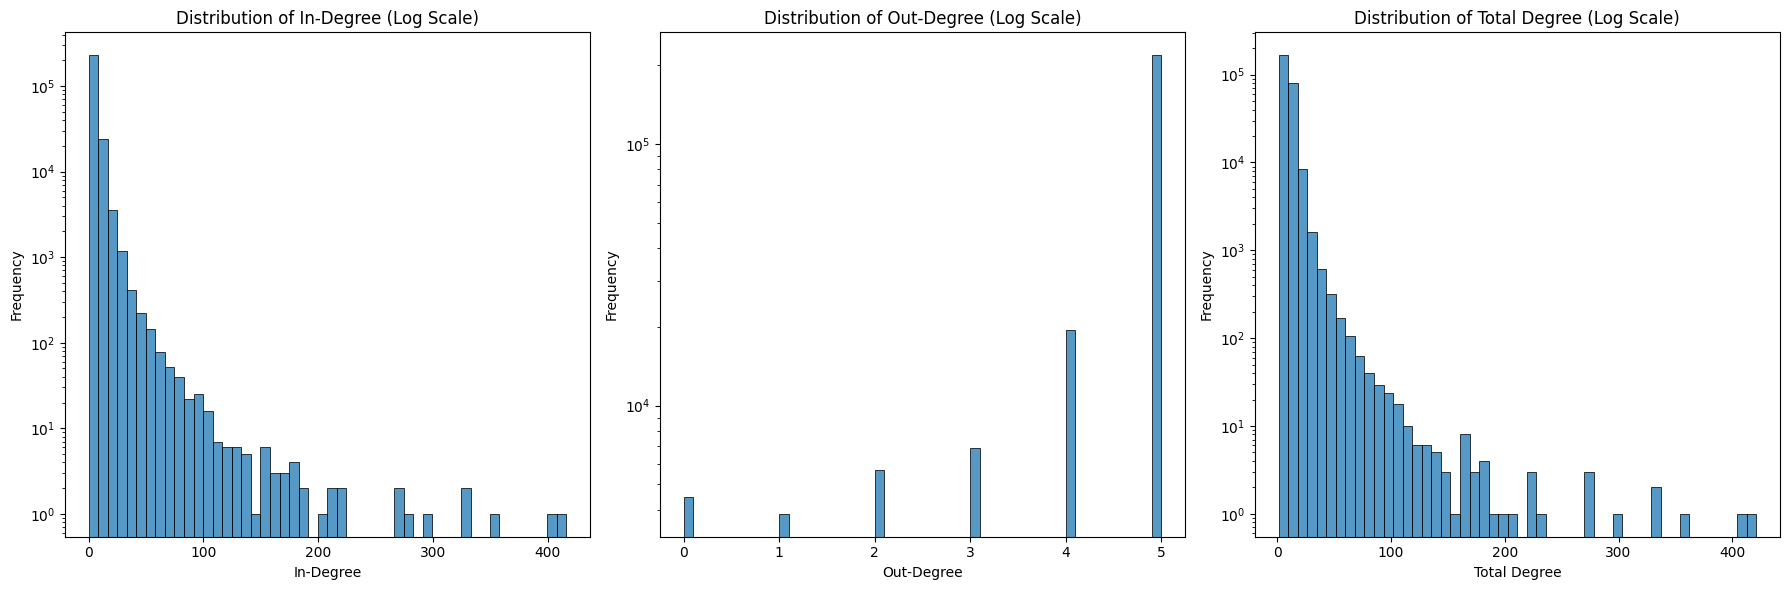

In [6]:
in_degree_counts = pd.Series([degree for node, degree in loaded_graph.in_degree()])
out_degree_counts = pd.Series([degree for node, degree in loaded_graph.out_degree()])
degree_counts = pd.Series([degree for node, degree in loaded_graph.degree()])

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(in_degree_counts, bins=50, log=True, ax=axes[0])
axes[0].set_title('Distribution of In-Degree (Log Scale)')
axes[0].set_xlabel('In-Degree')
axes[0].set_ylabel('Frequency')

sns.histplot(out_degree_counts, bins=50, log=True, ax=axes[1])
axes[1].set_title('Distribution of Out-Degree (Log Scale)')
axes[1].set_xlabel('Out-Degree')
axes[1].set_ylabel('Frequency')

sns.histplot(degree_counts, bins=50, log=True, ax=axes[2])
axes[2].set_title('Distribution of Total Degree (Log Scale)')
axes[2].set_xlabel('Total Degree')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### In-Degree Distribution
Dari grafik dikiri dapat dilihat bahwa distribusi in-degree semakin menurun, grafik ini menunjukkan bahwa sebagian besar node memiliki in-degree yang kecil, sementara hanya sedikit node yang memiliki in-degree tinggi. Dari hasil yang didapatkan banyak bahwa beberapa produk sering direkomendasikan atau dibeli bersamaan dengan banyak produk lainnya. Produk dengan in-degree tinggi kemungkinan besar adalah produk populer atau produk utama dalam kategori tertentu.

### Out-Degree Distribution

Dari grafik ditengah dapat dilihat bahwa distribusi out-degree tampak lebih spars dengan hanya beberapa nilai spesifik yang muncul dalam jumlah besar. Hasil ini menunjukkan bahwa produk yang sering muncul sebagai rekomendasi untuk produk lainnya.

### Total Degree Distribution
Dari grafik di kanan dapat dilihat bahwa pola yang didapatkan mirip dengan in-degree, ini menunjukkan bahwa hanya beberapa produk yang memiliki banyak koneksi, baik sebagai rekomendasi maupun produk yang sering dibeli bersama.



### Connected components

Number of weakly connected components: 22


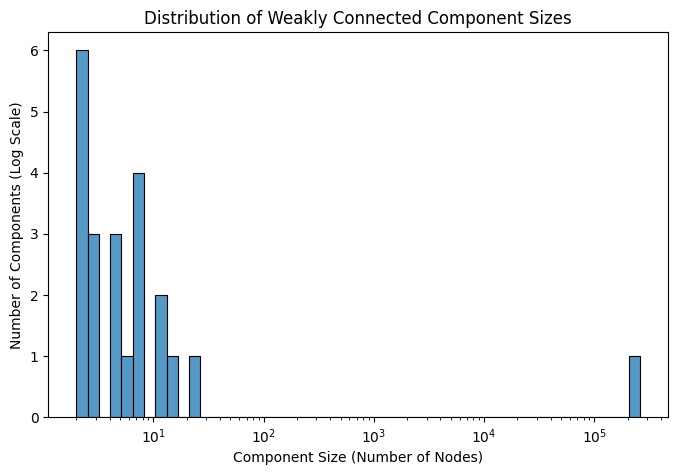

Largest weakly connected component size: 258968
Proportion of nodes in largest component: 99.95%


In [7]:
weakly_connected_components = list(nx.weakly_connected_components(loaded_graph))
num_weakly_connected_components = nx.number_weakly_connected_components(loaded_graph)
size_weakly_connected_components = [len(c) for c in weakly_connected_components]

print(f"Number of weakly connected components: {num_weakly_connected_components}")

plt.figure(figsize=(8, 5))
sns.histplot(size_weakly_connected_components, bins=50, log_scale=True, kde=False)
plt.xlabel("Component Size (Number of Nodes)")
plt.ylabel("Number of Components (Log Scale)")
plt.title("Distribution of Weakly Connected Component Sizes")
plt.show()

largest_component_size = max(size_weakly_connected_components)
print(f"Largest weakly connected component size: {largest_component_size}")
proportion_nodes_in_largest_component = largest_component_size / loaded_graph.number_of_nodes()
print(f"Proportion of nodes in largest component: {proportion_nodes_in_largest_component:.2%}")

- Ada total 22 komponen terhubung lemah (weakly connected components) dalam graph berarti sebagian besar node saling terhubung, masih ada beberapa subgraph kecil yang terisolasi dan tidak memiliki hubungan dengan komponen utama.

- Ukuran komponen terbesar adalah 258,968 node ini menunjukkan bahwa hampir seluruh produk dalam dataset Anda membentuk satu jaringan besar yang saling berhubungan dalam co-purchasing.

- Proporsi node dalam komponen terbesar adalah 99.95% Ini berarti bahwa hampir semua produk berada dalam satu komponen besar, menunjukkan adanya struktur jaringan skala besar yang terkoneksi kuat.

- Dari histogram, terlihat bahwa sebagian besar weakly connected components berukuran kurang dari 10 node. Komponen tersebut bisa terdiri dari produk yang tidak banyak dibeli bersama dengan produk lain atau kategori produk yang sangat spesifik. Alasan komponen kecil ini muncul mungkin karena produk niche atau eksklusif sehingga jarang muncul dalam pola co-purchasing. 


### Diameter, Average path length

In [ ]:
ig_graph = ig.Graph.TupleList(loaded_graph.edges(), directed=True)

diameter = ig_graph.diameter(directed=True)
avg_path_length = ig_graph.average_path_length(directed=True)

{'diameter': 88,
 'average_path_length': 20.07406801230009,
 'nodes': 259102,
 'edges': 1207337}

In [9]:
print(f"Diameter: {diameter:.2f}")
print(f"Average Path_Length: {avg_path_length}")

Diameter: 88.00
Average Path_Length: 20.07406801230009


- Diameter  88 artinya jika  memilih dua node yang paling jauh dalam graph, maka perlu melewati maksimal 88 hubungan untuk berpindah dari satu node ke node lainnya. Diameter yang besar berarti sebuah produk memiliki hubungan tidak langsung yang sangat panjang sebelum mencapai produk lainnya

- Average Path lenght 20.07 berarti bahwa, rata-rata, untuk mencapai satu produk dari produk lain dalam jaringan, diperlukan sekitar 20 hubungan pembelian bersama. Hasil ini menunjukkan bahwa hubungan antara produk tetap relatif efisien dalam menyebarkan informasi atau koneksi.

### Clustering Coefficient 

In [ ]:
clustering_coeff = nx.clustering(loaded_graph)
print("Clustering coefficient for each node:")
for node, centrality in clustering_coeff.items():
    print(f"Node {node}: Clustering Coefficient = {centrality:.4f}")

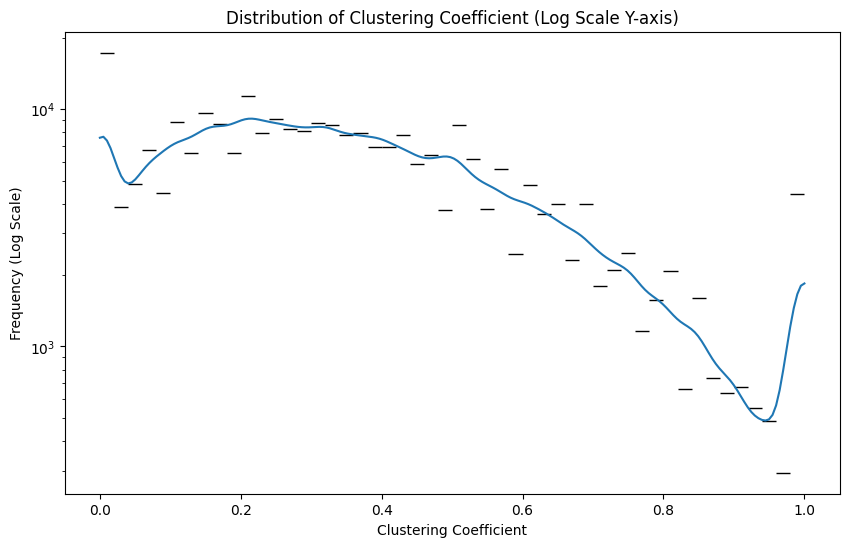

In [21]:
clustering_coeff_values = list(clustering_coeff.values())

plt.figure(figsize=(10, 6))
sns.histplot(clustering_coeff_values, bins=50, kde=True, log_scale=(False, True)) 
plt.title('Distribution of Clustering Coefficient (Log Scale Y-axis)')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency (Log Scale)')
plt.show()

Dari hasil grafik diatas dapat dilihat bahwa frekuensi tertinggi berada di rentang 0.1 - 0.4, ini berarti bahwa banyaknya node dalam graph memiliki hubungan clustering yang rendah hingga sedang ini berarti bahwa mereka terhubung ke beberapa tetangga tetapi tidak semuanya saling terhubung.. Selanjutnya setelah nilai 0.4 distribusi semakin menurun yang menunjukkan bahwa semakin sedikit node yang memiliki clustering coefficient tinggi. Selanjutnya dapat dilihat bahwa terdapat beberapa node dengan coefficient 1 mungkin terdapat banyak kelompok kecil  seperti produk yang selalu dibeli bersama dalam bundel.

### Average Clustering Coefficient

In [22]:
avg_clustering_coeff = nx.average_clustering(loaded_graph)
print(f"Average clustering coefficient: {avg_clustering_coeff:.4f}")

Average clustering coefficient: 0.3464


Dari hasil yang didapatkan nilai Average clustering coefficient adalah 0,3464 yang berarti 34,64% dari tetangga sebuah node terhubung satu sama lain. Nilai tersebut menunjukkan bahwa jaringan memiliki tingkat pengelompokan yang moderat.

# Centrality Measures

### Degree Centrality

In [8]:
degree_centrality = nx.degree_centrality(loaded_graph)
top_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 nodes by Degree Centrality:")
for node, centrality in top_degree_centrality:
    print(f"Node {node}: Centrality {centrality:.4f}")


Top 5 nodes by Degree Centrality:
Node 14949: Centrality 0.0016
Node 4429: Centrality 0.0016
Node 33: Centrality 0.0014
Node 10519: Centrality 0.0013
Node 12771: Centrality 0.0013


In [10]:
degree_nodes = [14949, 4429, 33, 10519, 12771]
top_degree_centrality_df = df[df['id'].isin(degree_nodes)]

top_degree_centrality_df

id                                     title  group  salesrank  \
32        33            Double Jeopardy (T*Witches, 6)   Book    97166.0   
4389    4429  Harley-Davidson Panheads, 1948-1965/M418   Book   147799.0   
10421  10519                                   Pilgrim  Music   141107.0   
12650  12771                             Jorge Negrete   Book   305561.0   
14805  14949                    Fodor's Australia 2000   Book   793062.0   

       review_cnt  downloads  rating  in_degree  out_degree  
32              4          4     5.0        352           5  
4389            3          3     4.5        400           5  
10421           7          7     4.5        331           5  
12650           1          1     4.0        327           4  
14805           1          1     5.0        416           5

In [11]:
top_degree_centrality_df[['id', 'title', 'group', 'downloads', 'rating', 'in_degree', 'out_degree']]

id                                     title  group  downloads  \
32        33            Double Jeopardy (T*Witches, 6)   Book          4   
4389    4429  Harley-Davidson Panheads, 1948-1965/M418   Book          3   
10421  10519                                   Pilgrim  Music          7   
12650  12771                             Jorge Negrete   Book          1   
14805  14949                    Fodor's Australia 2000   Book          1   

       rating  in_degree  out_degree  
32        5.0        352           5  
4389      4.5        400           5  
10421     4.5        331           5  
12650     4.0        327           4  
14805     5.0        416           5

Dari hasil yang didapatkan nilai tersebut sangat kecil berarti node tersebut mempunyai beberapa koneksi relatif terhadap jumlah total node ini menandakan bahwa graph tersebut sangat besar dan sparsely connected. Selanjutnya dengan nilai degree centrality tertinggi adalah 0.0016 maka bahwa node yang terhubung hanya terhubung ke sebagian kecil dari total graf.

### PageRank

In [12]:
pagerank_centrality = nx.pagerank(loaded_graph)
top_pagerank_centrality = sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("\nTop 5 nodes by PageRank Centrality:")
for node, centrality in top_pagerank_centrality:
    print(f"Node {node}: Centrality {centrality:.4f}")


Top 5 nodes by PageRank Centrality:
Node 4429: Centrality 0.0005
Node 33: Centrality 0.0005
Node 8: Centrality 0.0004
Node 93: Centrality 0.0003
Node 481: Centrality 0.0003


Node 4429 dan Node 33 mempunyai skor PageRank tertinggi, Ini berarti bahwa node tersebut mempunyai link dari node yang penting atau well-connected nodes. Dengan Degree centrality, node diukur berdasarkan jumlah connections. Sedangkan PageRank centrality nodes diukur berdasarkan kualitas link yang masuk. node dengan banyak koneksi mungkin tidak selalu memiliki PageRank yang tinggi jika koneksinya berasal dari node dengan peringkat rendah.

In [13]:
pagerank_nodes = [4429, 33, 8, 93, 481]
top_pagerank_centrality_df = df[df['id'].isin(pagerank_nodes)]

top_pagerank_centrality_df

id                                            title group  salesrank  \
7        8                              Losing Matt Shepard  Book   277409.0   
32      33                   Double Jeopardy (T*Witches, 6)  Book    97166.0   
92      93  BizPricer¿ Business Valuation Manual w/Software  Book  1485593.0   
477    481               A Major Case: A Novel by Pete Deer  Book  2860756.0   
4389  4429         Harley-Davidson Panheads, 1948-1965/M418  Book   147799.0   

      review_cnt  downloads  rating  in_degree  out_degree  
7             15         15     4.5        293           5  
32             4          4     5.0        352           5  
92             0          0     0.0        216           5  
477           14         14     4.5        273           5  
4389           3          3     4.5        400           5

In [14]:
top_pagerank_centrality_df[['id', 'title', 'group', 'downloads', 'rating', 'in_degree', 'out_degree']]

id                                            title group  downloads  \
7        8                              Losing Matt Shepard  Book         15   
32      33                   Double Jeopardy (T*Witches, 6)  Book          4   
92      93  BizPricer¿ Business Valuation Manual w/Software  Book          0   
477    481               A Major Case: A Novel by Pete Deer  Book         14   
4389  4429         Harley-Davidson Panheads, 1948-1965/M418  Book          3   

      rating  in_degree  out_degree  
7        4.5        293           5  
32       5.0        352           5  
92       0.0        216           5  
477      4.5        273           5  
4389     4.5        400           5

### Betweenness Centrality (sample for large graphs)

In [15]:
sorted_nodes = sorted(pagerank_centrality, key=pagerank_centrality.get, reverse=True)[:1000] 
subgraph = loaded_graph.subgraph(sorted_nodes).copy()

betweenness_centrality_page = nx.betweenness_centrality(subgraph)
top_betweenness_centrality = sorted(betweenness_centrality_page.items(), key=lambda x: x[1], reverse=True)[:5]

print("\nTop 5 nodes by Betweenness Centrality based on top 1000 nodes Page Rank : ")
for node, centrality in top_betweenness_centrality:
    print(f"Node {node}: Centrality {centrality:.4f}")



Top 5 nodes by Betweenness Centrality based on top 1000 nodes Page Rank : 
Node 481: Centrality 0.0081
Node 2501: Centrality 0.0062
Node 151: Centrality 0.0057
Node 8458: Centrality 0.0056
Node 8: Centrality 0.0051


In [16]:
pagerank_nodes = [481, 2501, 151, 8458, 8]
betweenness_centrality_page_df = df[df['id'].isin(pagerank_nodes)]

betweenness_centrality_page_df

id                                              title group  \
7        8                                Losing Matt Shepard  Book   
150    151              Laurel & Hardy - Flying Deuces/Utopia   DVD   
477    481                 A Major Case: A Novel by Pete Deer  Book   
2480  2501  The Narcissistic Family : Diagnosis and Treatment  Book   
8380  8458  Making Their Own Way: Narratives for Transform...  Book   

      salesrank  review_cnt  downloads  rating  in_degree  out_degree  
7      277409.0          15         15     4.5        293           5  
150     44671.0          13         13     3.0         85           5  
477   2860756.0          14         14     4.5        273           5  
2480     9727.0          19         19     5.0        191           5  
8380   145243.0           1          1     5.0        106           5

In [17]:
betweenness_centrality_page_df[['id', 'title', 'group', 'downloads', 'rating', 'in_degree', 'out_degree']]

id                                              title group  \
7        8                                Losing Matt Shepard  Book   
150    151              Laurel & Hardy - Flying Deuces/Utopia   DVD   
477    481                 A Major Case: A Novel by Pete Deer  Book   
2480  2501  The Narcissistic Family : Diagnosis and Treatment  Book   
8380  8458  Making Their Own Way: Narratives for Transform...  Book   

      downloads  rating  in_degree  out_degree  
7            15     4.5        293           5  
150          13     3.0         85           5  
477          14     4.5        273           5  
2480         19     5.0        191           5  
8380          1     5.0        106           5

Pada kasus ini dipilih 1000 node dengan PageRank tertinggi, dimana kasus ini akan fokus pada bagian graph yang memiliki pengaruh signifikan dalam struktur jaringan.

Dari hasil yang didapatkan Node 481 memiliki betweenness centrality tertinggi (0.0081), yang menunjukkan bahwa node ini sering menjadi jembatan antar kelompok produk yang sering dibeli. tetapi nilai tersebut masih kecil, sehingga ini mengindikasikan bahwa memiliki banyak jalur alternatif.

In [18]:
betweenness_centrality = nx.betweenness_centrality(loaded_graph, k=1000)
top_betweenness_centrality_5 = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("\nTop 5 nodes by Betweenness Centrality approximate 1000: ")
for node, centrality in top_betweenness_centrality_5:
    print(f"Node {node}: Centrality {centrality:.4f}")



Top 5 nodes by Betweenness Centrality approximate 1000: 
Node 2501: Centrality 0.0243
Node 7629: Centrality 0.0235
Node 13222: Centrality 0.0217
Node 6935: Centrality 0.0216
Node 10072: Centrality 0.0175


In [22]:
pagerank_nodes = [2501, 7629, 13222, 6935, 10072]
top_betweenness_centrality_approximate_df = df[df['id'].isin(pagerank_nodes)]

top_betweenness_centrality_approximate_df

id                                              title  group  \
2480    2501  The Narcissistic Family : Diagnosis and Treatment   Book   
6865    6935                              Where There Is No Vet   Book   
7556    7629                        More Than You Think You Are  Music   
9977   10072           The Yellow Fountain (La Fuente Amarilla)    DVD   
13097  13222                      If I Were a Man, I'd Marry Me   Book   

       salesrank  review_cnt  downloads  rating  in_degree  out_degree  
2480      9727.0          19         19     5.0        191           5  
6865    672391.0           0          0     0.0          9           5  
7556       766.0         382        382     4.5         26           5  
9977     39867.0           4          4     4.0         23           5  
13097   807679.0           8          8     5.0         46           5

In [23]:
top_betweenness_centrality_approximate_df[['id', 'title', 'group', 'downloads', 'rating', 'in_degree', 'out_degree']]

id                                              title  group  \
2480    2501  The Narcissistic Family : Diagnosis and Treatment   Book   
6865    6935                              Where There Is No Vet   Book   
7556    7629                        More Than You Think You Are  Music   
9977   10072           The Yellow Fountain (La Fuente Amarilla)    DVD   
13097  13222                      If I Were a Man, I'd Marry Me   Book   

       downloads  rating  in_degree  out_degree  
2480          19     5.0        191           5  
6865           0     0.0          9           5  
7556         382     4.5         26           5  
9977           4     4.0         23           5  
13097          8     5.0         46           5

Pada kasus ini dilakukan pendekatan estimasi untuk menghitung Betweenness Centrality dalam graph transaksi Amazon. Pendekatan ini menggunakan parameter k=1000, yang berarti hanya 1000 node yang dipilih secara acak untuk mempercepat perhitungan, dari hasil yang didapatkan node 7629 merupakan produk yang sering menjadi perantara dalam jalur transaksi, dan menjadi penghubung utama dalam transaksi co-purchasing.

In [ ]:
nx_to_igraph = ig.Graph.TupleList(loaded_graph.edges(), directed=loaded_graph.is_directed())

betweenness_centrality_igraph = nx_to_igraph.betweenness()

betweenness_centrality_dict = {node: betweenness_centrality_igraph[idx] for idx, node in enumerate(loaded_graph.nodes())}

top_betweenness_centrality_5_igraph = sorted(betweenness_centrality_dict.items(), key=lambda x: x[1], reverse=True)[:5]

print("\nTop 5 nodes by Betweenness Centrality (using igraph): ")
for node, centrality in top_betweenness_centrality_5_igraph:
    print(f"Node {node}: Centrality {centrality:.4f}")


Top 5 nodes by Betweenness Centrality (using igraph): 
Node 3658: Centrality 1606678675.9249
Node 2693: Centrality 1577508568.6957
Node 7851: Centrality 1433519828.2663
Node 9845: Centrality 1394511688.8611
Node 12959: Centrality 1168736499.7694


In [24]:
pagerank_nodes = [3658, 2693, 7851, 9845, 12959]
betweenness_centrality_df = df[df['id'].isin(pagerank_nodes)]

betweenness_centrality_df

id                                              title  group  \
2672    2693                                              Storm  Music   
3627    3658               Expressionism in Philosophy: Spinoza   Book   
7777    7851                            Islam: Religion of Life   Book   
9753    9845  Good News for Women: A Biblical Picture of Gen...   Book   
12837  12959  StarFox Adventures: Dinosaur Planet: Prima's O...   Book   

       salesrank  review_cnt  downloads  rating  in_degree  out_degree  
2672     19093.0          15         15     4.5         10           5  
3627    312858.0           2          2     4.5          4           5  
7777     60074.0           0          0     0.0          1           5  
9753    467310.0          11         11     4.0          2           5  
12837   372944.0           1          1     5.0          2           5

In [25]:
betweenness_centrality_df[['id', 'title', 'group', 'downloads', 'rating', 'in_degree', 'out_degree']]

id                                              title  group  \
2672    2693                                              Storm  Music   
3627    3658               Expressionism in Philosophy: Spinoza   Book   
7777    7851                            Islam: Religion of Life   Book   
9753    9845  Good News for Women: A Biblical Picture of Gen...   Book   
12837  12959  StarFox Adventures: Dinosaur Planet: Prima's O...   Book   

       downloads  rating  in_degree  out_degree  
2672          15     4.5         10           5  
3627           2     4.5          4           5  
7777           0     0.0          1           5  
9753          11     4.0          2           5  
12837          1     5.0          2           5

Dikarenakan graphnya sangat besar maka digunakan igraph dikarenakan lebih efisien dibandingkan NetworkX dalam perhitungan betweenness centrality. Dari hasil yang didapatkan terlihat bahwa Node 3658 memiliki betweenness centrality tertinggi, menunjukkan bahwa node ini sering berada di jalur terpendek antara node lain dalam directed graph dan menjadi penghubung utama dalam transaksi co-purchasing.

### Closeness Centrality (sample for large graphs, and handling disconnected components)

In [31]:
nx_graph = loaded_graph
ig_graph = ig.Graph.TupleList(nx_graph.edges(), directed=nx_graph.is_directed())

harmonic_closeness = ig_graph.harmonic_centrality()
node_list = list(nx_graph.nodes())
harmonic_closeness_dict = {node_list[i]: harmonic_closeness[i] for i in range(len(node_list))}

top_5_harmonic = sorted(harmonic_closeness_dict.items(), key=lambda x: x[1], reverse=True)[:5]

print("\nTop 5 nodes by Harmonic Closeness Centrality (iGraph -> NetworkX):")
for node, centrality in top_5_harmonic:
    print(f"Node {node}: Centrality {centrality:.4f}")


Top 5 nodes by Harmonic Closeness Centrality (iGraph -> NetworkX):
Node 6562: Centrality 0.2029
Node 164: Centrality 0.1978
Node 277: Centrality 0.1965
Node 431: Centrality 0.1939
Node 2693: Centrality 0.1935


In [26]:
pagerank_nodes = [6562, 164, 277, 431, 2693]
harmonic_closeness_df = df[df['id'].isin(pagerank_nodes)]

harmonic_closeness_df

id                                              title  group  \
163    164  What's Really Wrong With You: A Revolutionary ...   Book   
276    277  The Complete Idiot's Guide to 401(k) Plans (2n...   Book   
427    431                   Hungarian Vizsla (World of Dogs)   Book   
2672  2693                                              Storm  Music   
6493  6562            Roman Transliteration of the Holy Quran   Book   

      salesrank  review_cnt  downloads  rating  in_degree  out_degree  
163    224993.0          12         12     3.5         21           5  
276    216529.0           2          2     5.0          1           5  
427    721894.0           2          2     4.5          1           5  
2672    19093.0          15         15     4.5         10           5  
6493  1035917.0           0          0     0.0          3           5

In [27]:
harmonic_closeness_df[['id', 'title', 'group', 'downloads', 'rating', 'in_degree', 'out_degree']]

id                                              title  group  \
163    164  What's Really Wrong With You: A Revolutionary ...   Book   
276    277  The Complete Idiot's Guide to 401(k) Plans (2n...   Book   
427    431                   Hungarian Vizsla (World of Dogs)   Book   
2672  2693                                              Storm  Music   
6493  6562            Roman Transliteration of the Holy Quran   Book   

      downloads  rating  in_degree  out_degree  
163          12     3.5         21           5  
276           2     5.0          1           5  
427           2     4.5          1           5  
2672         15     4.5         10           5  
6493          0     0.0          3           5

Pada kasus ini digunakan harmonic closeness karena bekerja lebih bagus pada directed graph dan weakly connected components dibandingkan closeness centrality biasanya, karena closeness centrality hanya bisa hitung untuk node yang memiliki jalur ke semua node lainnya (graph strongly connected). Dari hasil yang didapatkan node 6562 memiliki harmonic closeness centrality tertinggi (0.2029), yang berarti node ini memiliki jalur pendek ke banyak node lain dalam jaringan daan artinya produk ini lebih dekat ke banyak produk lain dalam struktur transaksi. 

### Create and Export Graph

In [ ]:
df = pd.read_csv("products_cleaned_engineered.csv")

centrality_df = pd.DataFrame({
    'id': list(pagerank_centrality.keys()),
    'pagerank_centrality': list(pagerank_centrality.values()),
    'betweenness_centrality': list(betweenness_centrality_dict.values()),
    'harmonic_closeness_centrality': list(harmonic_closeness_dict.values()),
    'degree_centrality': list(degree_centrality.values())

})

print(centrality_df)

df = df.merge(centrality_df, on='id', how='left')


df.to_csv('products_cleaned_engineered_centrality.csv', index=False)

In [ ]:
df_copurchase = pd.read_csv('copurchase_cleaned.csv')

G = nx.from_pandas_edgelist(df_copurchase, 'Source', 'Target', create_using=nx.DiGraph())

node_attrs = df.set_index('id').to_dict('index')
nx.set_node_attributes(G, node_attrs)

print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

Graph has 259102 nodes and 1207337 edges


In [37]:
import pickle

pickle_file_path = 'amazon_copurchase_graph.pickle'
with open(pickle_file_path, 'wb') as f:
    pickle.dump(G, f)

In [38]:
graphml_file_path = 'amazon_copurchase_graph.graphml'

nx.write_graphml(G, graphml_file_path)

In [1]:
%env NX_CUGRAPH_AUTOCONFIG=True

env: NX_CUGRAPH_AUTOCONFIG=True


In [2]:
!pip install igraph leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pickle
import igraph as ig
import leidenalg as la
import seaborn as sns

In [4]:
def load_community_result(*args):
    """Load community results from pickle files."""
    communities = []
    for file in args:
        with open(file, 'rb') as f:
            communities.append(pickle.load(f))
    return communities

def calculate_community_quality(G, community):
    """Calculates quality metrics for a given community structure in a graph.

    This function computes three common metrics to assess the quality of a
    community partition in a graph: modularity, coverage, and performance.

    Modularity measures the strength of division of a network into communities.
    It quantifies the difference between the fraction of edges within communities
    and the expected fraction if edges were distributed at random. Higher
    modularity values (closer to 1) generally indicate better community structure.

    Coverage is the fraction of edges that fall within communities. It measures
    how much of the network's connectivity is captured by the identified
    communities. Higher coverage is generally desirable.

    Performance is a metric that combines coverage and the fraction of vertices
    in communities. It is designed to be less sensitive to the number of
    communities and the size of the graph than coverage alone. Higher performance
    values are generally better.

    Args:
        G (nx.Graph): The NetworkX graph for which to calculate community quality.
        community (list of set): A list of sets, where each set represents a
            community and contains the nodes belonging to that community.
            For example: `[{1, 2, 3}, {4, 5}]` represents two communities.

    Returns:
        dict: A dictionary containing the calculated community quality metrics.
              The dictionary has the following keys:
                - 'modularity' (float): The modularity score of the community structure.
                - 'coverage' (float): The coverage score of the community structure.
                - 'performance' (float): The performance score of the community structure.

    Examples:
        >>> import networkx as nx
        >>> G = nx.karate_club_graph()
        >>> community = [{0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21}, {9, 14, 15, 16, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]
        >>> quality_metrics = calculate_community_quality(G, community)
        >>> print(quality_metrics)
        {'modularity': 0.3792373075876584, 'coverage': 0.77875, 'performance': 0.6007444168734458}
    """
    modularity = nx.community.modularity(G, community)
    community_quality_result = nx.community.partition_quality(G, community)
    return {
        'modularity': modularity,
        'coverage': community_quality_result[0],
        'performance': community_quality_result[1],
    }

def analyze_community_sizes(communities):
    """
    Analyze community sizes when communities are provided as a list of sets
    """
    # Calculate size of each community
    sizes = [len(community) for community in communities]

    return {
        'total_communities': len(communities),
        'largest_community': max(sizes),
        'smallest_community': min(sizes),
        'average_size': np.mean(sizes),
        'median_size': np.median(sizes),
        'size_distribution': sizes
    }

def visualize_community_sample(G, communities, method_name, max_nodes=500):
    """
    Visualize sample of largest and medium communities with directed edges and nodes colored by group
    communities: list of sets where each set contains nodes of one community
    """
    sorted_communities = sorted(communities, key=len, reverse=True)

    # Get top 3 largest communities
    largest_communities = sorted_communities[:3]

    # Get 3 communities from the middle
    middle_idx = len(sorted_communities) // 2
    middle_communities = sorted_communities[middle_idx-1:middle_idx+2]

    # Define color mapping for different product groups
    group_colors = {
        'Book': 'royalblue',
        'Music': 'limegreen',
        'DVD': 'crimson',
        'Video': 'gold',
        'Software': 'purple',
        'CE': 'orange',
        'Baby Product': 'pink',
        'Toy': 'cyan',
        'Video Games': 'darkgreen'
    }
    # Default color for unknown groups
    default_color = 'lightgray'

    plt.figure(figsize=(18, 10), facecolor='white')

    # Function to draw a single community subplot
    def draw_community(community, subplot_idx, label):
        plt.subplot(2, 3, subplot_idx)

        # Get nodes in this community
        nodes = list(community)

        # If too many nodes, sample them
        if len(nodes) > max_nodes:
            nodes = np.random.choice(nodes, max_nodes, replace=False)

        # Create subgraph
        subgraph = G.subgraph(nodes)
        pos = nx.spring_layout(subgraph, seed=42)

        # Get node colors based on group attribute
        node_colors = []
        for node in subgraph.nodes():
            try:
                # Try to get group attribute, use default color if not found
                group = G.nodes[node].get('group', None)
                node_colors.append(group_colors.get(group, default_color))
            except:
                node_colors.append(default_color)

        # Draw nodes with group colors
        nx.draw_networkx_nodes(subgraph, pos, node_size=30, node_color=node_colors)

        # Draw directed edges with arrows
        nx.draw_networkx_edges(subgraph, pos, alpha=0.4, width=0.5,
                              arrows=True, arrowsize=10, arrowstyle='->')

        comm_id = list(communities).index(community)
        plt.title(f"{method_name} - {label} Community {comm_id} (n={len(community)})")
        plt.axis('off')

        # Add legend for group colors
        unique_groups = set()
        for node in subgraph.nodes():
            try:
                group = G.nodes[node].get('group', None)
                if group:
                    unique_groups.add(group)
            except:
                pass

        # Create legend with only groups present in this community
        legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                           markerfacecolor=group_colors.get(group, default_color),
                           label=group, markersize=8)
                           for group in unique_groups]

        if legend_elements:
            plt.legend(handles=legend_elements, loc='upper right', fontsize='x-small')

    # Draw top 3 communities
    for i, community in enumerate(largest_communities):
        draw_community(community, i+1, "Largest")

    # Draw middle 3 communities
    for i, community in enumerate(middle_communities):
        draw_community(community, i+4, "Medium")

    plt.tight_layout()
    plt.show()

In [5]:
df_products = pd.read_csv('products_cleaned_engineered.csv')
df_copurchases = pd.read_csv('copurchase_cleaned.csv')

pickle_file_path = 'amazon_copurchase_graph.pickle'
with open(pickle_file_path, 'rb') as f:
    G = pickle.load(f)
print(f"Loaded graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

node_num, edge_num = G.number_of_nodes(), G.number_of_edges()

SEED = 28

Loaded graph with 259102 nodes and 1207337 edges


**Notes for algorithm used**:

* The only direct graph community detection are Louvain, LPA, Greedy, Fluid, Leiden, and Infomap. The rest are approximated by converting the graph into undirected first
* Girvan-Newman, Kernighan-Lin, K-clique, Lukes, etc. aren't used because they are not scalable to large graphs (would take forever)

In [ ]:
louvain_communities = nx.community.louvain_communities(G, seed=SEED)
louvain_partition = nx.community.louvain_partitions(G, seed=SEED)
print(f"Found {len(louvain_communities)} communities using Louvain")

# with open('louvain_communities.pickle', 'wb') as f:
#     pickle.dump(louvain_communities, f)

Found 218 communities using Louvain


In [ ]:
lpa_communities_generator = nx.community.fast_label_propagation_communities(G, seed=SEED)
lpa_communities = list(lpa_communities_generator)
print(f"Found {len(lpa_communities)} communities using LPA")

with open('lpa_communities.pickle', 'wb') as f:
    pickle.dump(lpa_communities, f)

Found 32680 communities using LPA


In [ ]:
# NOTE: Potential for hyperparameter tuning. Params to be tuned:
# - Resolution parameter (resolution=1.0). Try to lower this for larger community (should do it since our graph is very large)
# - best_n (default = None)
# - Curoff (default = 1)
greedy_modularity = nx.community.greedy_modularity_communities(G)
print(f"Found {len(greedy_modularity)} communities using Greedy Modularity")

with open('greedy_modularity.pickle', 'wb') as f:
    pickle.dump(greedy_modularity, f)

Found 1168 communities using Greedy Modularity


In [ ]:
G_undirected = G.to_undirected()

In [ ]:
largest_connected_component_nodes = max(nx.connected_components(G_undirected), key=len)
largest_connected_component = G_undirected.subgraph(largest_connected_component_nodes)

fluid_community = nx.community.asyn_fluidc(largest_connected_component, k=500, seed=SEED)
fluid_community = list(fluid_community)

all_nodes = set(G_undirected.nodes())
lcc_nodes = set(largest_connected_component_nodes)
outside_community_nodes = list(all_nodes - lcc_nodes)

fluid_community.append(set(outside_community_nodes))

with open('fluid_communities.pickle', 'wb') as f:
    pickle.dump(fluid_community, f)

/usr/local/lib/python3.10/dist-packages/networkx/utils/backends.py:1777: UserWarning: Note: conversions to backend graphs are saved to cache (`G.__networkx_cache__` on the original graph) by default.

This warning means the cached graph is being used for the 'cugraph' backend in the call to connected_components.

For the cache to be consistent (i.e., correct), the input graph must not have been manually mutated since the cached graph was created. Examples of manually mutating the graph data structures resulting in an inconsistent cache include:

    >>> G[u][v][key] = val

and

    >>> for u, v, d in G.edges(data=True):
    ...     d[key] = val

Using methods such as `G.add_edge(u, v, weight=val)` will correctly clear the cache to keep it consistent. You may also use `G.__networkx_cache__.clear()` to manually clear the cache, or set `G.__networkx_cache__` to None to disable caching for G. Enable or disable caching globally via `nx.config.cache_converted_graphs` config.

To disable this

In [6]:
nodes = list(G.nodes())
node_map = {node: i for i, node in enumerate(nodes)}

# Create igraph graph
igraph_representation = ig.Graph(directed=G.is_directed())
igraph_representation.add_vertices(len(nodes))

# Add edges
edges = [(node_map[u], node_map[v]) for u, v in G.edges()]
igraph_representation.add_edges(edges)

# Add node attributes (including group for visualization)
for node, data in G.nodes(data=True):
    idx = node_map[node]
    for attr, value in data.items():
        if attr == 'group':  # Ensure group attribute is transferred
            igraph_representation.vs[idx][attr] = value

# Store original node IDs for mapping back
igraph_representation.vs['name'] = nodes

igraph_representation = ig.Graph.from_networkx(G)
leiden_partition = la.find_partition(igraph_representation, la.ModularityVertexPartition, n_iterations=-1, seed=SEED)

leiden_communities = []
for community in leiden_partition:
    community_set = {nodes[idx] for idx in community}
    leiden_communities.append(community_set)

print(f"Found {len(leiden_communities)} communities using Leiden algorithm")

with open('leiden_communities.pickle', 'wb') as f:
    pickle.dump(leiden_communities, f)

Found 477 communities using Leiden algorithm


In [7]:
# Buat dictionary komunitas dari hasil Leiden
community_dict = {}  # {product_id: community_id}

for community_id, community in enumerate(leiden_communities):
    for product_id in community:
        community_dict[product_id] = community_id  # Assign each product to a community

# Pastikan df_products memiliki kolom 'id' yang sesuai dengan product_id dalam komunitas
if 'id' not in df_products.columns:
    raise KeyError("Kolom 'id' tidak ditemukan di df_products. Pastikan ini adalah product_id.")

# Tambahkan kolom 'community' ke df_products berdasarkan mapping komunitas
df_products["community"] = df_products["id"].map(community_dict)

# Periksa apakah ada produk yang tidak memiliki komunitas
missing_communities = df_products["community"].isna().sum()
print(f"Jumlah produk tanpa komunitas: {missing_communities}")

# Jika ada yang kosong, isi dengan -1 sebagai kategori "tanpa komunitas"
df_products["community"] = df_products["community"].fillna(-1).astype(int)

print("Kolom 'community' berhasil ditambahkan ke df_products!")

Jumlah produk tanpa komunitas: 65
Kolom 'community' berhasil ditambahkan ke df_products!


In [ ]:
nodes = list(G.nodes())
node_map = {node: i for i, node in enumerate(nodes)}

# Create igraph graph
igraph_representation = ig.Graph(directed=G.is_directed())
igraph_representation.add_vertices(len(nodes))

# Add edges
edges = [(node_map[u], node_map[v]) for u, v in G.edges()]
igraph_representation.add_edges(edges)

# Add node attributes (including group for visualization)
for node, data in G.nodes(data=True):
    idx = node_map[node]
    for attr, value in data.items():
        if attr == 'group':  # Ensure group attribute is transferred
            igraph_representation.vs[idx][attr] = value

# Store original node IDs for mapping back
igraph_representation.vs['name'] = nodes

igraph_representation = ig.Graph.from_networkx(G)
vertex_clustering = igraph_representation.community_infomap(trials=20)

# Convert results to NetworkX format (list of sets)
infomap_communities = []
for cluster in vertex_clustering:
    community_set = {nodes[idx] for idx in cluster}
    infomap_communities.append(community_set)

print(f"Found {len(infomap_communities)} communities using Infomap algorithm")

with open('infomap_communities.pickle', 'wb') as f:
    pickle.dump(infomap_communities, f)

Found 17578 communities using Infomap algorithm


In [8]:
louvain_communities, lpa_communities, greedy_modularity, fluid_community, leiden_communities, infomap_communities = load_community_result('louvain_communities.pickle', 'lpa_communities.pickle', 'greedy_modularity.pickle', 'fluid_communities.pickle', 'leiden_communities.pickle', 'infomap_communities.pickle')

In [9]:
evaluation_df = pd.DataFrame(columns=['method', 'modularity', 'coverage', 'performance'])
statistics_df = pd.DataFrame(columns=['method', 'total_communities', 'largest_community', 'smallest_community', 'average_size', 'median_size', 'size_distribution'])

name_to_community_dict = {
    'Louvain': louvain_communities,
    'LPA': lpa_communities,
    'Greedy Modularity': greedy_modularity,
    'Fluid': fluid_community,
    'Leiden': leiden_communities,
    'Infomap': infomap_communities,
}

for method_name, communities in name_to_community_dict.items():
    # Calculate community quality metrics
    quality_metrics = calculate_community_quality(G, communities)
    row_eval_df = pd.DataFrame([{'method': method_name, **quality_metrics}])
    evaluation_df = pd.concat([evaluation_df, row_eval_df], ignore_index=True)

    # Analyze community sizes
    community_sizes = analyze_community_sizes(communities)
    row_stats_df = pd.DataFrame([{'method': method_name, **community_sizes}])
    statistics_df = pd.concat([statistics_df, row_stats_df], ignore_index=True)

<ipython-input-9-0b7c0a0ac931>:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  evaluation_df = pd.concat([evaluation_df, row_eval_df], ignore_index=True)
<ipython-input-9-0b7c0a0ac931>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  statistics_df = pd.concat([statistics_df, row_stats_df], ignore_index=True)


In [10]:
display(evaluation_df)
display(statistics_df)

method  modularity  coverage  performance
0            Louvain    0.915720  0.933588     0.982295
1                LPA    0.711033  0.711109     0.999950
2  Greedy Modularity    0.883099  0.935846     0.948647
3              Fluid    0.810303  0.812435     0.997898
4             Leiden    0.923866  0.938456     0.985481
5            Infomap    0.785317  0.785426     0.999922

method total_communities largest_community smallest_community  \
0            Louvain               218             15988                  2   
1                LPA             32680               471                  2   
2  Greedy Modularity              1168             34840                  2   
3              Fluid               501               921                134   
4             Leiden               477              8664                  2   
5            Infomap             17578               250                  1   

   average_size  median_size  \
0   1188.541284        395.0   
1      7.928458          6.0   
2    221.833904         12.0   
3    517.169661        510.0   
4    543.190776         19.0   
5     14.740130         12.0   

                                   size_distribution  
0  [3396, 115, 2302, 3407, 2216, 305, 3738, 1804,...  
1  [8, 10, 22, 9, 25, 8, 24, 5, 49, 8, 43, 9, 12,...  
2  [34840, 31149, 19133, 18446, 9797, 8540, 8084,...  
3  [582, 227, 542, 472, 448, 635, 450, 620, 390, ...  
4  [8664, 8312, 8305, 7839, 6837, 6809, 5837, 540...  
5  [2, 19, 90, 29, 31, 8, 32, 62, 56, 98, 68, 10,...

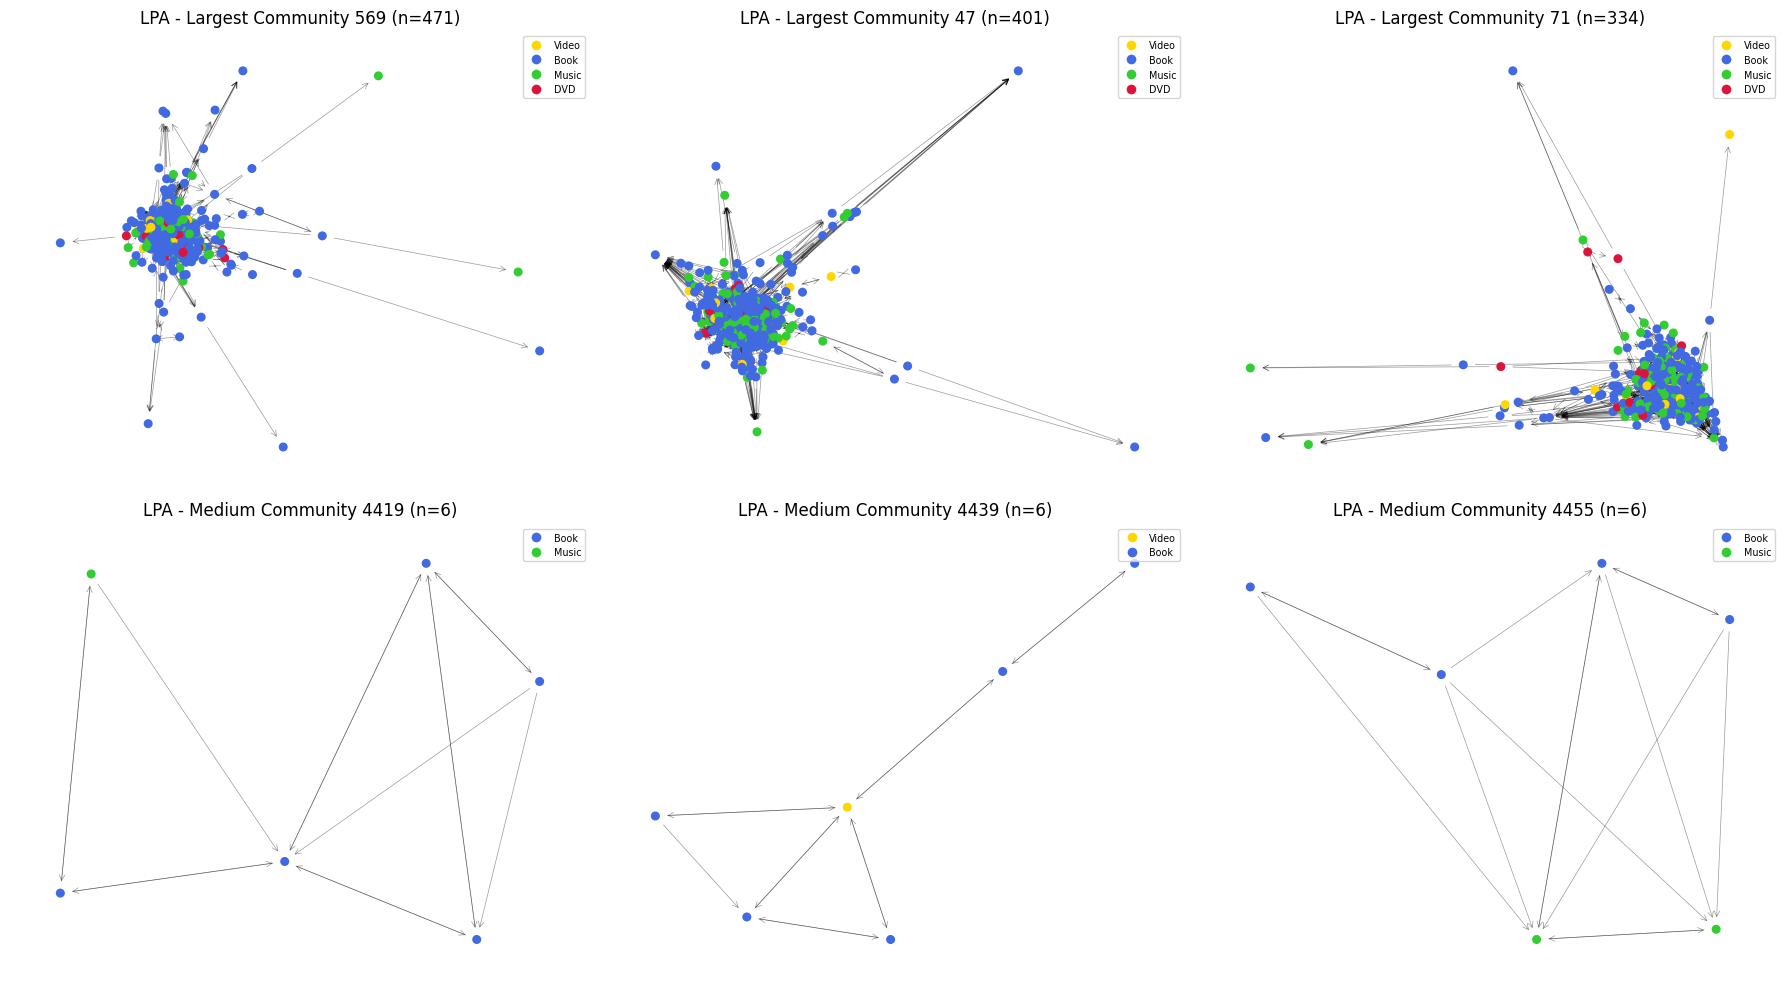

In [11]:
visualize_community_sample(G, lpa_communities, "LPA", max_nodes=500)

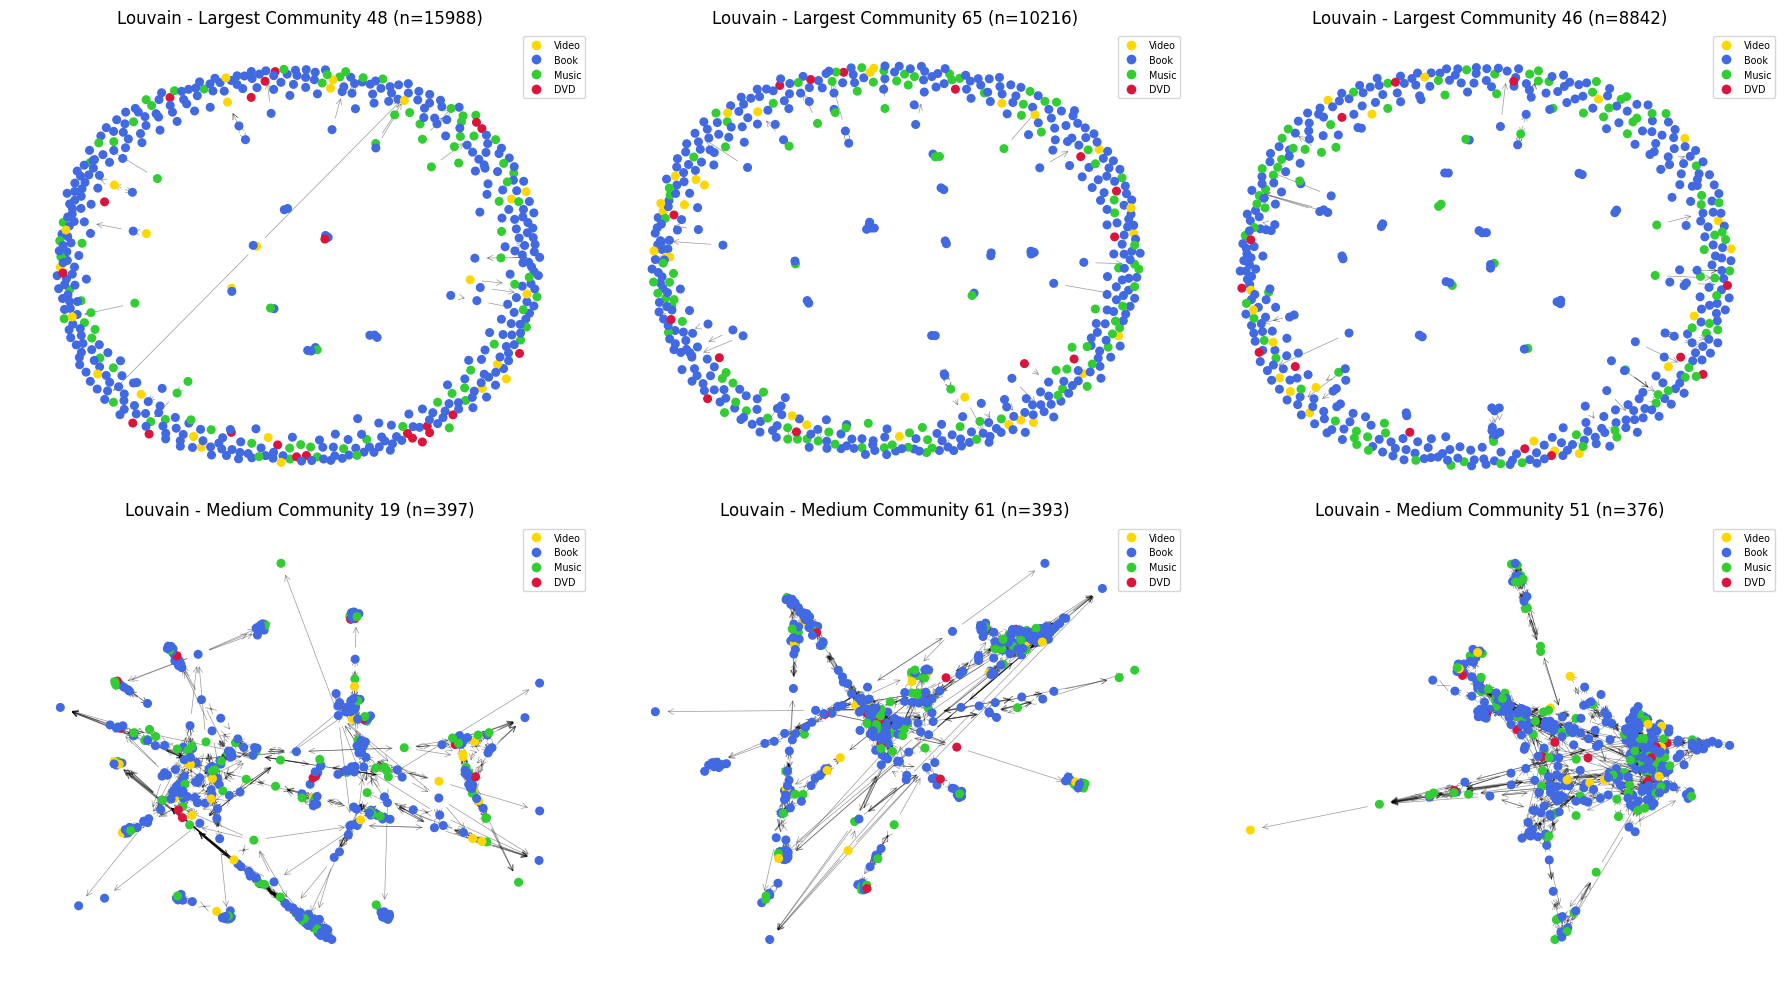

In [12]:
visualize_community_sample(G, louvain_communities, "Louvain", max_nodes=500)

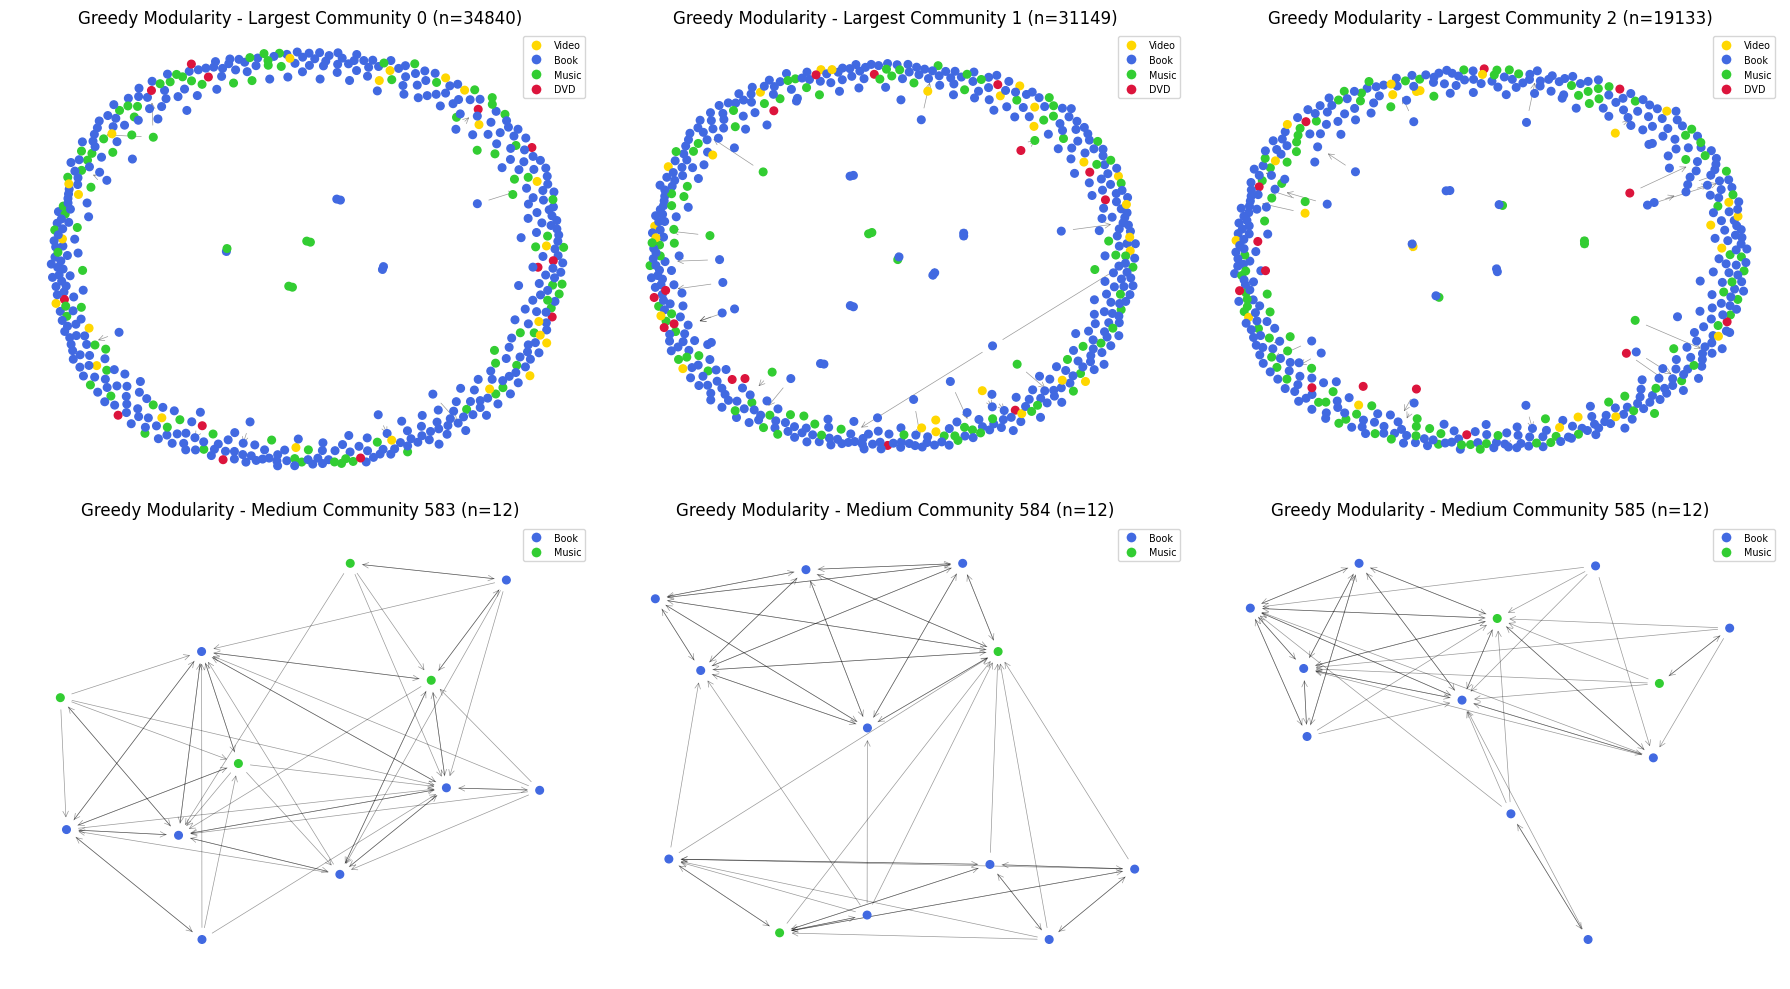

In [13]:
visualize_community_sample(G, greedy_modularity, "Greedy Modularity", max_nodes=500)

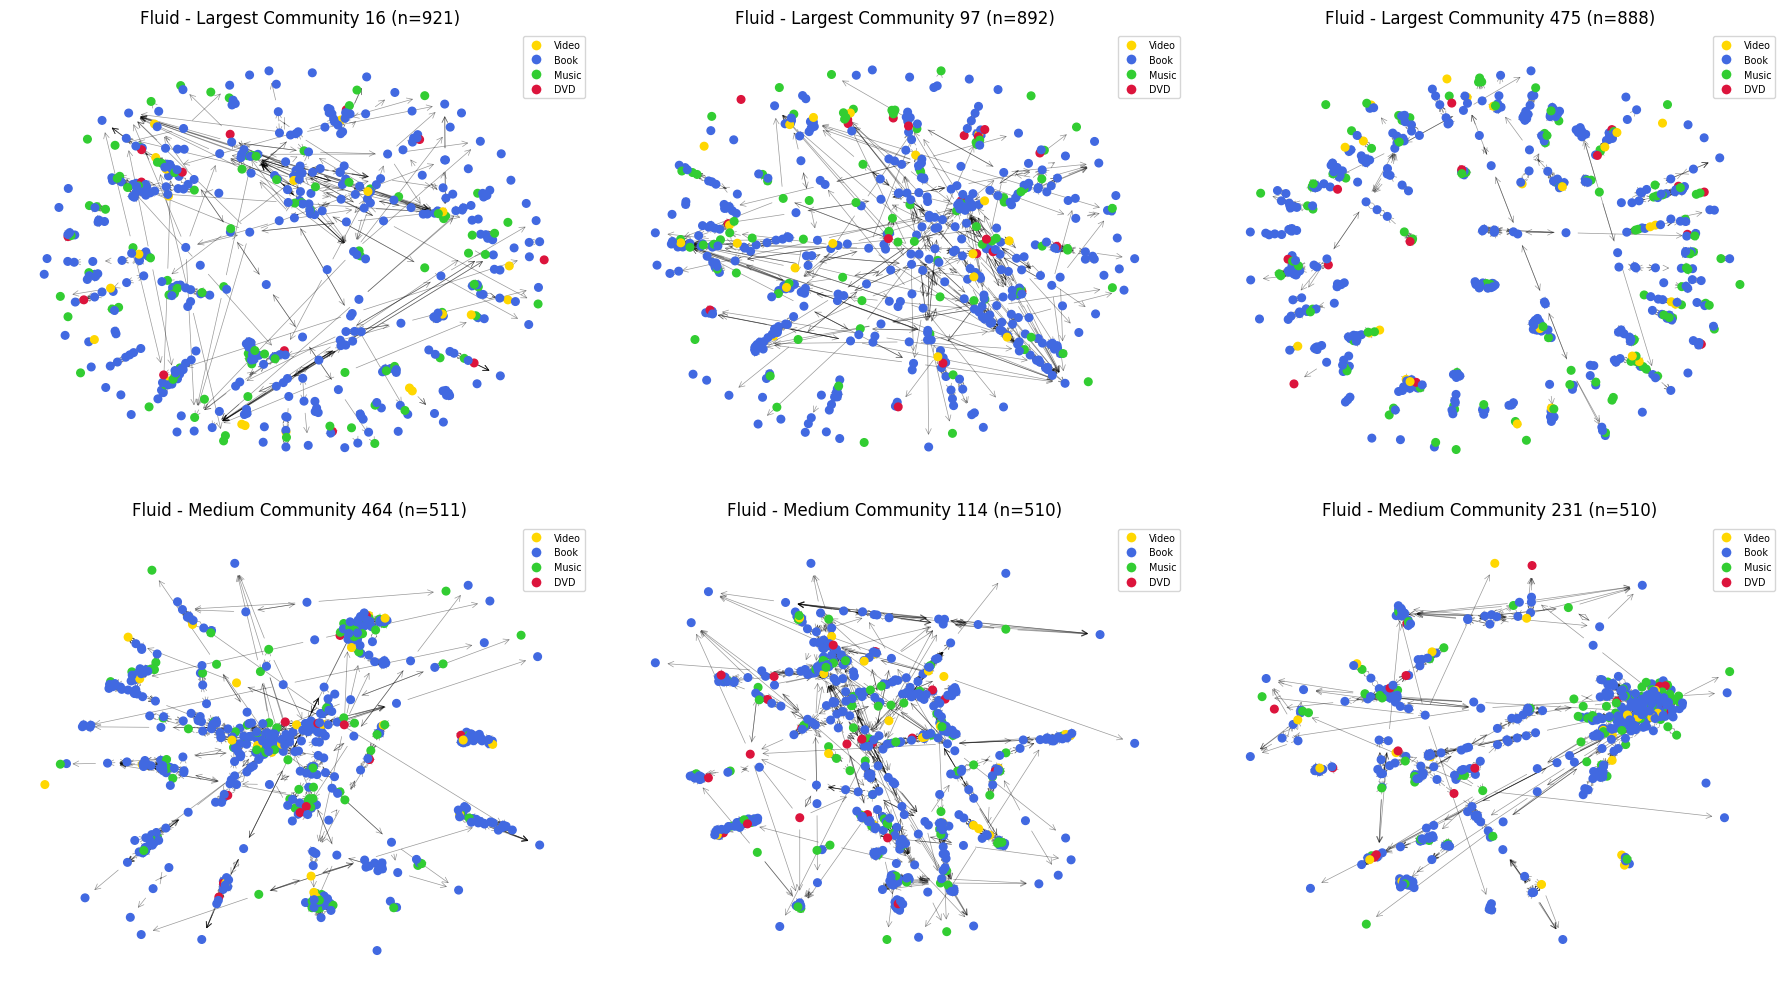

In [14]:
visualize_community_sample(G, fluid_community, "Fluid", max_nodes=500)

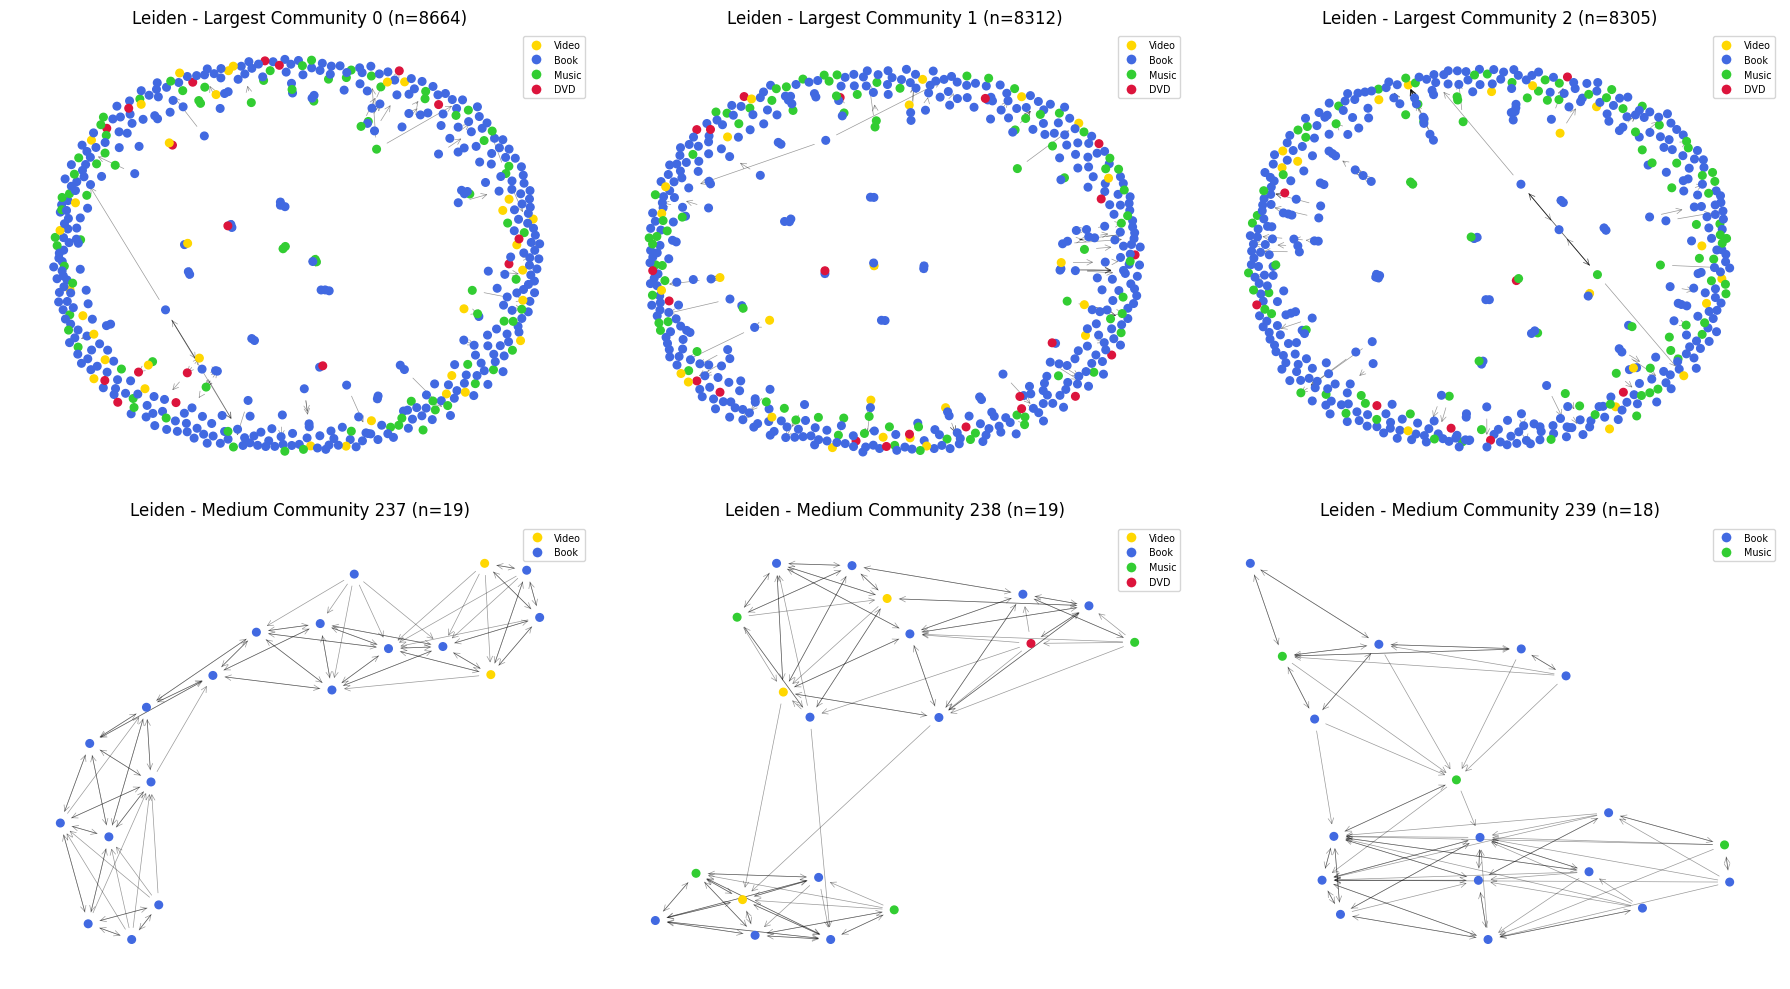

In [15]:
visualize_community_sample(G, leiden_communities, "Leiden", max_nodes=500)

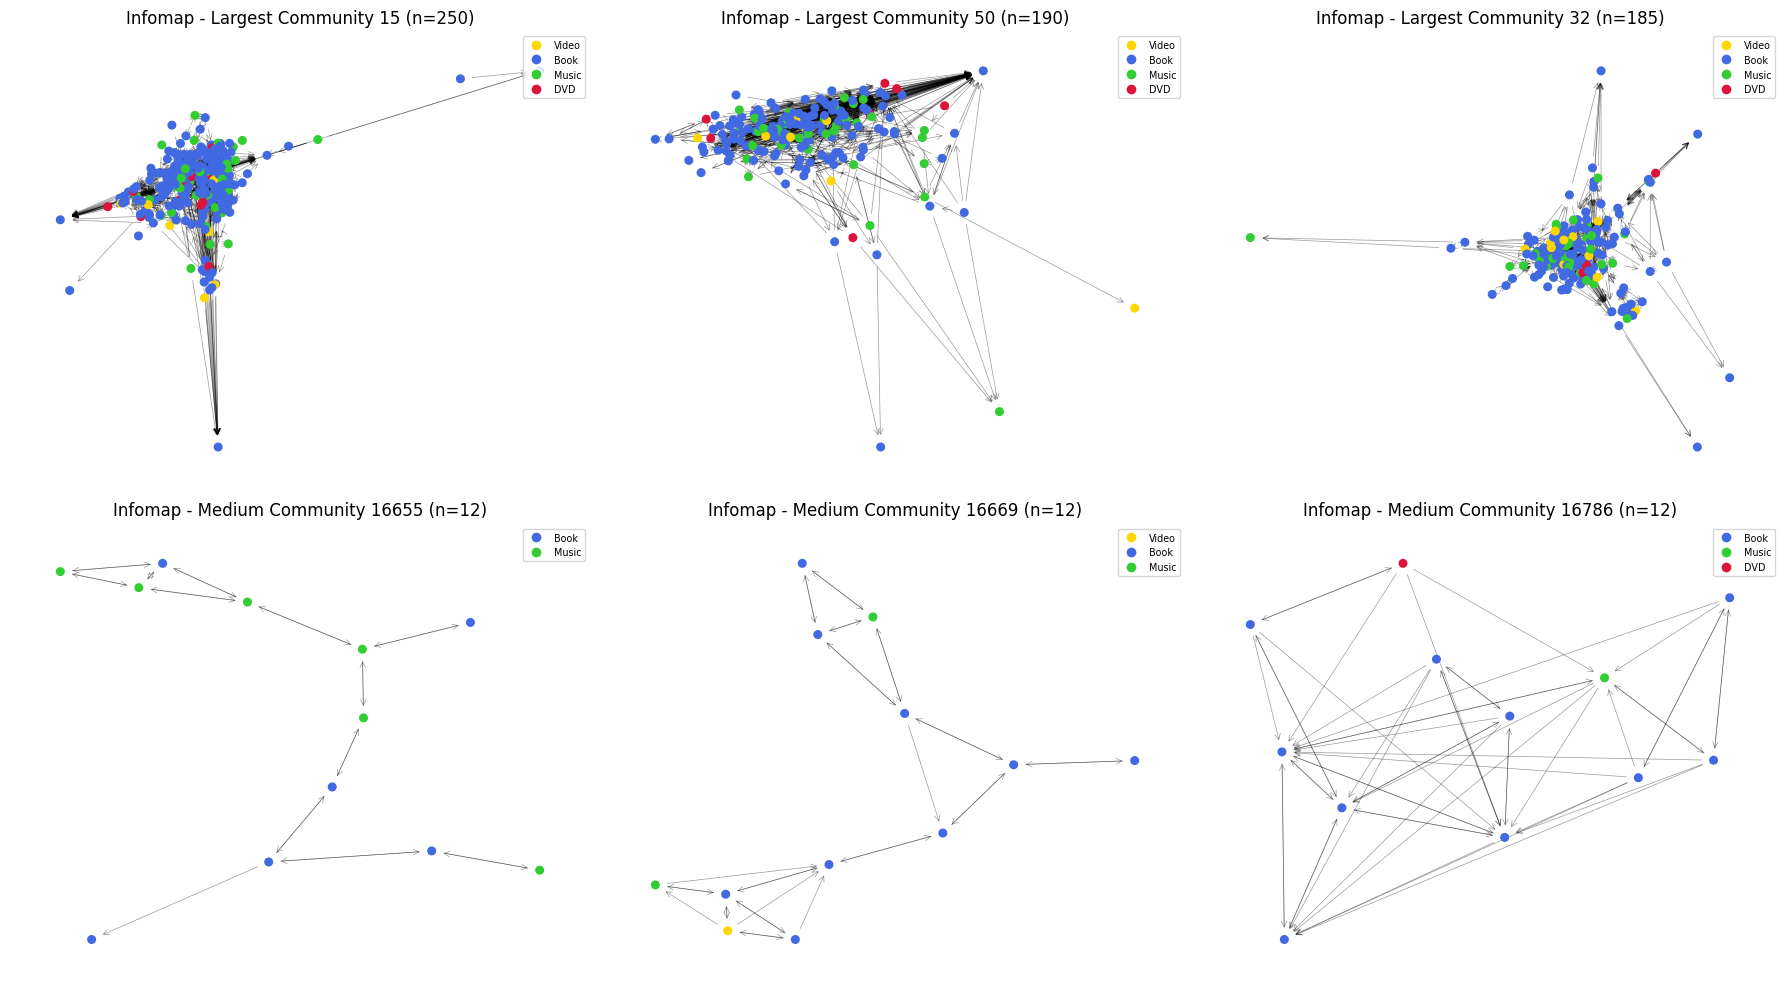

In [16]:
visualize_community_sample(G, infomap_communities, "Infomap", max_nodes=500)

## Analisis

Berdasarkan 6 metode yang digunakan dalam community detection ini (Louvain, LPA, Greedy Modularity, Fluid, Leiden, dan Infomap), analisis akan difokuskan pada metode **Leiden** dan **Infomap** dengan alasan sebagai berikut :

**Leiden**
1. Modularity tertinggi (0.923866) : Menunjukkan bahwa komunitas yang ditemukan memiliki struktur yang lebih jelas dibanding metode lain
2. Coverage tinggi (0.938456) : Komunitas yang ditemukan mencakup sebagian besar koneksi dalam jaringan
3. Memiliki keseimbangan antara modularity dan coverage, yang menjadikannya pilihan kuat untuk komunitas dengan struktur yang jelas

**Infomap**
1. Performance tertinggi (0.999922) : Menunjukkan kemampuan dalam menangani skala besar dengan efisiensi tinggi
2. Cocok untuk menemukan komunitas yang berbasis pada alur informasi, yang penting dalam jaringan co-purchasing karena sering kali produk yang berkaitan memiliki hubungan aliran informasi yang kuat
3. Lebih baik dalam menangkap komunitas berbasis navigasi atau pola pembelian pengguna

**Kesimpulan**
**Leiden** digunakan karena menghasilkan komunitas yang lebih modular dan terdefinisi, sementara **Infomap** digunakan karena mampu mengungkap pola informasi dan navigasi antar produk.

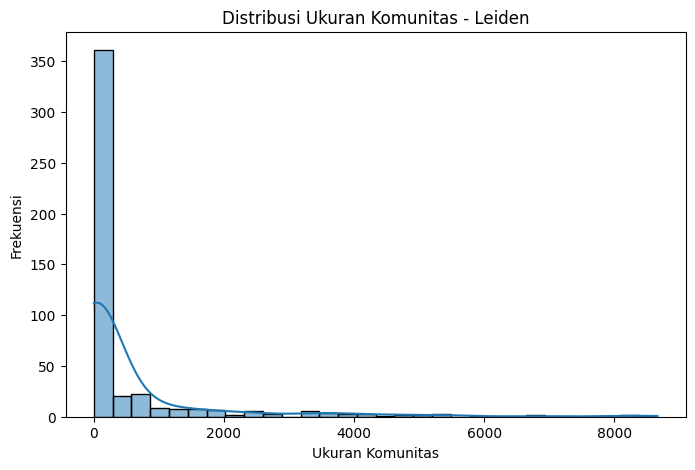

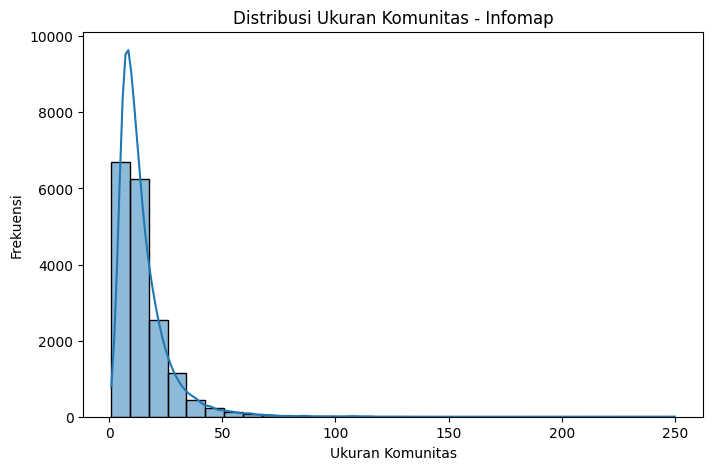

In [17]:
# (1) Histogram Ukuran Komunitas

# Ekstrak size_distribution untuk Leiden dan Infomap
leiden_sizes = statistics_df[statistics_df['method'] == 'Leiden']['size_distribution'].values[0]
infomap_sizes = statistics_df[statistics_df['method'] == 'Infomap']['size_distribution'].values[0]

# Plot histogram untuk Leiden
plt.figure(figsize=(8, 5))
sns.histplot(leiden_sizes, bins=30, kde=True)
plt.xlabel("Ukuran Komunitas")
plt.ylabel("Frekuensi")
plt.title("Distribusi Ukuran Komunitas - Leiden")
plt.show()

# Plot histogram untuk Infomap
plt.figure(figsize=(8, 5))
sns.histplot(infomap_sizes, bins=30, kde=True)
plt.xlabel("Ukuran Komunitas")
plt.ylabel("Frekuensi")
plt.title("Distribusi Ukuran Komunitas - Infomap")
plt.show()

In [18]:
# (2) Analisis Isi Komunitas

# Hitung jumlah produk dalam setiap komunitas
community_counts = df_products["community"].value_counts()

# Ambil ID komunitas terbesar
largest_community_id = community_counts.idxmax()

print("Distribusi jumlah produk per komunitas (Top 10):")
print(community_counts.head(10))

# Ambil produk dalam komunitas terbesar
df_largest = df_products[df_products["community"] == largest_community_id]

# Periksa apakah ada produk dalam komunitas terbesar
if df_largest.empty:
    raise ValueError(f"Tidak ada produk dalam komunitas terbesar dengan ID {largest_community_id}.")

# Lihat kategori produk yang dominan dalam komunitas terbesar
print("\nKategori produk dalam komunitas terbesar:")
print(df_largest["group"].value_counts())

# Lihat statistik tambahan komunitas terbesar
print("\nStatistik komunitas terbesar:")
print(df_largest.describe())

Distribusi jumlah produk per komunitas (Top 10):
community
0    8664
1    8312
2    8305
3    7839
4    6837
5    6809
6    5837
7    5401
8    5368
9    5327
Name: count, dtype: int64

Kategori produk dalam komunitas terbesar:
group
Book     6284
Music    1615
Video     453
DVD       312
Name: count, dtype: int64

Statistik komunitas terbesar:
                  id     salesrank   review_cnt    downloads       rating  \
count    8664.000000  8.664000e+03  8664.000000  8664.000000  8664.000000   
mean   132431.579409  4.940263e+05    13.971607    13.530702     3.192578   
std     63231.449649  5.674695e+05    63.028192    54.607239     2.009944   
min      6973.000000  4.200000e+01     0.000000     0.000000     0.000000   
25%     81361.000000  9.293350e+04     0.000000     0.000000     0.000000   
50%    128646.500000  3.105830e+05     2.000000     2.000000     4.000000   
75%    181696.750000  6.749218e+05     8.000000     8.000000     5.000000   
max    262025.000000  3.697787e+06  2

<ipython-input-19-e66d9b72ee3a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


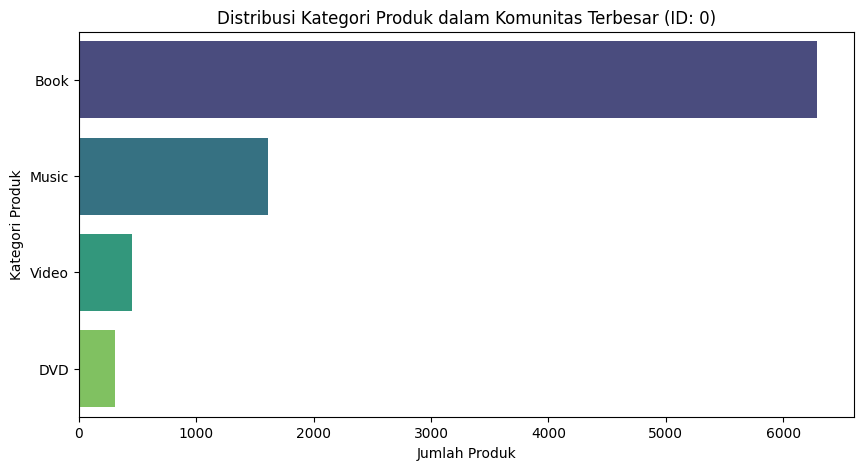

In [19]:
# Pastikan ada cukup data untuk visualisasi
if df_largest["group"].nunique() > 1:  # Minimal ada lebih dari satu kategori produk
    plt.figure(figsize=(10, 5))
    sns.countplot(
        y=df_largest["group"],
        order=df_largest["group"].value_counts().index,
        palette="viridis"
    )
    plt.xlabel("Jumlah Produk")
    plt.ylabel("Kategori Produk")
    plt.title(f"Distribusi Kategori Produk dalam Komunitas Terbesar (ID: {largest_community_id})")
    plt.show()
else:
    print("Tidak cukup variasi kategori produk untuk divisualisasikan.")

In [20]:
# (3) Produk Paling Sentral dalam Komunitas

# Subgraf komunitas terbesar
subgraph = G.subgraph(df_largest["id"])

# Hitung degree centrality dalam komunitas terbesar
centrality = nx.degree_centrality(subgraph)

# Ambil 5 node dengan centrality tertinggi
top_central_nodes_sorted = sorted(centrality.items(), key=lambda x: x[1], reverse=True)

print("Top 5 central nodes dalam komunitas terbesar :")
for rank, (node, centrality_value) in enumerate(top_central_nodes_sorted[:5], start=1):
    # Ambil informasi tambahan dari df_products
    node_info = df_products[df_products["id"] == node].iloc[0]
    product_title = node_info["title"]
    product_group = node_info["group"]

    # Cetak informasi lengkap
    print(f"{rank}. Node {node}: {centrality_value:.6f}")
    print(f"   🔹 Nama Produk  : {product_title}")
    print(f"   🔹 Kategori     : {product_group}")
    print()

Top 5 central nodes dalam komunitas terbesar :
1. Node 31037: 0.017546
   🔹 Nama Produk  : Lyrical Ballads and Related Writings (New Riverside Editions)
   🔹 Kategori     : Book

2. Node 15934: 0.015122
   🔹 Nama Produk  : Designing CMOS Circuits for Low Power (European Low-Power Initiative for Electronic System Design (Series).)
   🔹 Kategori     : Book

3. Node 26010: 0.013967
   🔹 Nama Produk  : Environmental Principles: From Political Slogans to Legal Rules
   🔹 Kategori     : Book

4. Node 20898: 0.010158
   🔹 Nama Produk  : Scottie-Robbie : The Story of a True Champion
   🔹 Kategori     : Book

5. Node 20899: 0.008542
   🔹 Nama Produk  : Another Joyous Occasion
   🔹 Kategori     : Music



In [21]:
# (4) Hubungan Antar-Komunitas

from collections import Counter

# Pastikan community_dict sudah didefinisikan
community_dict = df_products.set_index("id")["community"].to_dict()

# Hitung jumlah edge antar komunitas
inter_community_edges = sum(1 for u, v in G.edges if community_dict.get(u) != community_dict.get(v))
print(f"Jumlah edge antar komunitas: {inter_community_edges}")

# Hitung komunitas mana yang paling sering terhubung ke komunitas lain
edge_list = [(community_dict.get(u), community_dict.get(v)) for u, v in G.edges if community_dict.get(u) != community_dict.get(v)]
counter = Counter(edge_list)

# Cetak 5 hubungan antar komunitas yang paling sering terjadi
print("\nTop inter-community connections :")
for ((comm1, comm2), count) in counter.most_common(5):
    print(f"Komunitas {comm1} ↔ Komunitas {comm2}: {count} koneksi")

# Identifikasi node yang menjadi penghubung antar komunitas
bridging_nodes = [u for u, v in G.edges if community_dict.get(u) != community_dict.get(v)]
bridging_nodes = list(set(bridging_nodes))  # Hapus duplikat

print("\nTop 5 nodes yang menjadi penghubung antar komunitas :")
for rank, node in enumerate(bridging_nodes[:5], start=1):
    if node in df_products["id"].values:
        node_info = df_products[df_products["id"] == node].iloc[0]
        product_title = node_info["title"]
        product_group = node_info["group"]

        print(f"{rank}. Node {node}:")
        print(f"   🔹 Nama Produk  : {product_title}")
        print(f"   🔹 Kategori     : {product_group}")
        print(f"   🔹 Komunitas    : {community_dict[node]}")
        print()

Jumlah edge antar komunitas: 74304

Top inter-community connections :
Komunitas 2 ↔ Komunitas 3: 1752 koneksi
Komunitas 11 ↔ Komunitas 1: 607 koneksi
Komunitas 3 ↔ Komunitas 2: 544 koneksi
Komunitas 1 ↔ Komunitas 11: 479 koneksi
Komunitas 16 ↔ Komunitas 4: 430 koneksi

Top 5 nodes yang menjadi penghubung antar komunitas :
1. Node 1:
   🔹 Nama Produk  : Patterns of Preaching: A Sermon Sampler
   🔹 Kategori     : Book
   🔹 Komunitas    : 10

2. Node 2:
   🔹 Nama Produk  : Candlemas: Feast of Flames
   🔹 Kategori     : Book
   🔹 Komunitas    : 10

3. Node 5:
   🔹 Nama Produk  : Prayers That Avail Much for Business: Executive
   🔹 Kategori     : Book
   🔹 Komunitas    : 10

4. Node 6:
   🔹 Nama Produk  : How the Other Half Lives: Studies Among the Tenements of New York
   🔹 Kategori     : Book
   🔹 Komunitas    : 27

5. Node 7:
   🔹 Nama Produk  : Batik
   🔹 Kategori     : Music
   🔹 Komunitas    : 10



In [22]:
# (5) Jumlah koneksi lintas komunitas untuk setiap node

# Dictionary komunitas untuk setiap node
community_dict = {node: idx for idx, comm in enumerate(communities) for node in comm}

# Menghitung jumlah koneksi lintas komunitas untuk setiap node
boundary_nodes = {}

for u, v in G.edges:
    comm_u = community_dict.get(u)
    comm_v = community_dict.get(v)

    if comm_u != comm_v:  # Jika berasal dari komunitas berbeda
        boundary_nodes[u] = boundary_nodes.get(u, 0) + 1
        boundary_nodes[v] = boundary_nodes.get(v, 0) + 1

# Ambil 5 produk yang paling sering terhubung antar komunitas
top_boundary_nodes = sorted(boundary_nodes.items(), key=lambda x: x[1], reverse=True)[:5]

# Pastikan kolom 'name' atau alternatifnya digunakan
product_name_col = 'name' if 'name' in df_products.columns else 'title' if 'title' in df_products.columns else 'product_name'

# Menampilkan nama produk dari df_products
print("Top 5 Boundary Nodes :")
for product_id, connections in top_boundary_nodes:
    product_name = df_products.loc[df_products['id'] == product_id, product_name_col].values
    product_name = product_name[0] if len(product_name) > 0 else "Unknown Product"
    print(f"{product_name} (ID : {product_id}): {connections} koneksi lintas komunitas")

Top 5 Boundary Nodes :
Fodor's Australia 2000 (ID : 14949): 380 koneksi lintas komunitas
Harley-Davidson Panheads, 1948-1965/M418 (ID : 4429): 349 koneksi lintas komunitas
Jorge Negrete (ID : 12771): 318 koneksi lintas komunitas
Double Jeopardy (T*Witches, 6) (ID : 33): 312 koneksi lintas komunitas
Pilgrim (ID : 10519): 285 koneksi lintas komunitas


In [ ]:
# (6) Melihat Komunitas dan Kategori Produk Dominan

# Gabungkan komunitas dengan kategori produk (group)
community_counts = df_products.groupby("community")["group"].value_counts().unstack(fill_value=0)

# Ambil kategori dominan untuk setiap komunitas
dominant_categories = community_counts.idxmax(axis=1)

# Buat DataFrame untuk interpretasi komunitas
community_summary = pd.DataFrame({
    "Komunitas": dominant_categories.index,
    "Kategori Dominan": dominant_categories.values,
    "Jumlah Produk": df_products["community"].value_counts().sort_index().values
})

# Tampilkan hasil
print(community_summary)

     Komunitas Kategori Dominan  Jumlah Produk
0           -1             Book             65
1            0             Book           8664
2            1             Book           8312
3            2             Book           8305
4            3             Book           7839
..         ...              ...            ...
473        472             Book              2
474        473             Book              2
475        474             Book              2
476        475             Book              2
477        476             Book              2

[478 rows x 3 columns]


In [ ]:
from tqdm.auto import tqdm
import warnings
# --- 1. Initial Frequency Analysis ---
print("--- 1. Dominant Category by Frequency ---")
community_counts = df_products.groupby("community")["group"].value_counts().unstack(fill_value=0)
dominant_categories_freq = community_counts.idxmax(axis=1)
community_product_counts = df_products["community"].value_counts().sort_index()
community_summary_base = pd.DataFrame({
    "Total Products": community_product_counts,
    "Dominant Group (Freq)": dominant_categories_freq
})
N = 2
def get_top_n_groups(row, n):
    top_n = row.sort_values(ascending=False).head(n)
    return [f"{group} ({int(count)})" for group, count in top_n.items() if count > 0]
top_n_series = community_counts.apply(lambda row: get_top_n_groups(row, N), axis=1)
top_n_df = top_n_series.to_frame(name=f'Top {N} Groups (Freq)')
community_summary = community_summary_base.join(top_n_df)

# ***** FIX HERE *****
# Rename the correct column ('community') that resulted from reset_index()
community_summary = community_summary.reset_index().rename(columns={'community': 'Community'})
# *********************

print("Frequency Summary DataFrame structure:")
print(community_summary.info()) # Verify structure and 'Community' column (should be uppercase C now)
print("-" * 40)


# --- 2. Calculate Local Centrality and Find Dominant Groups ---
print("\n--- 2. Calculating Local Centralities per Community ---")

communities = df_products['community'].unique()
local_centrality_results = []

centrality_functions = {
    'Local PageRank': lambda G_view: nx.pagerank(G_view, alpha=0.85, weight=None) if G_view.number_of_nodes() > 0 else {},
    'Local Betweenness': lambda G_view: nx.betweenness_centrality(G_view, normalized=True, endpoints=False, weight=None) if G_view.number_of_nodes() > 1 else {},
    'Local Degree': lambda G_view: nx.degree_centrality(G_view) if G_view.number_of_nodes() > 0 else {},
}

for comm_id in tqdm(communities, desc="Processing Communities"):
    # Ensure community nodes are integers
    try:
        community_nodes = df_products[df_products['community'] == comm_id]['id'].astype(int).tolist()
    except ValueError as e:
        print(f"Skipping Community {comm_id}: Error converting node IDs to int - {e}")
        community_result = {'Community': comm_id}
        for name in centrality_functions.keys():
             community_result[f'Dominant Group (Avg {name})'] = pd.NA
        local_centrality_results.append(community_result)
        continue

    community_result = {'Community': comm_id}
    for name in centrality_functions.keys():
        community_result[f'Dominant Group (Avg {name})'] = pd.NA

    if not community_nodes:
        # print(f"Skipping Community {comm_id}: No nodes found.") # Already handled by empty list check
        local_centrality_results.append(community_result)
        continue

    subgraph_view = G.subgraph(community_nodes)

    if subgraph_view.number_of_nodes() == 0:
        # print(f"Skipping Centrality for Community {comm_id}: No nodes in subgraph.") # Already handled
        local_centrality_results.append(community_result)
        continue

    # Create a temporary clean graph with integer nodes
    temp_G = nx.DiGraph()
    try:
        # Ensure nodes added are integers
        temp_G.add_nodes_from([int(n) for n in subgraph_view.nodes()])
        # Add edges (edge endpoints should now be integers)
        temp_G.add_edges_from(subgraph_view.edges())
    except ValueError as e:
         print(f"Error creating clean graph nodes/edges for community {comm_id}: {e}")
         local_centrality_results.append(community_result) # Append dict with NAs
         continue


    local_centralities = {}
    calculation_successful = True
    for name, func in centrality_functions.items():
        try:
            if name == 'Local Betweenness' and temp_G.number_of_nodes() <= 1:
                 centrality_dict = {}
            elif temp_G.number_of_nodes() == 0:
                 centrality_dict = {}
            else:
                 centrality_dict = func(temp_G) # Pass the clean graph

            local_centralities[name] = centrality_dict
        except Exception as e:
            # Print error even more clearly indicating it's with the clean graph
            print(f"ERROR calculating {name} for community {comm_id} (Clean Graph Nodes: {temp_G.number_of_nodes()}, Edges: {temp_G.number_of_edges()}): {e}")
            # Check if the error is the specific TypeError again
            if isinstance(e, TypeError) and "integer is required" in str(e):
                 print(f"      >>> This community ({comm_id}) might have a structure incompatible with {name} in this NetworkX version, even without weights/non-int nodes.")
            local_centralities[name] = {}
            calculation_successful = False # Mark failure


    # --- Aggregation --- (Keep the aggregation logic from previous step)
    if calculation_successful or local_centralities:
        community_df = df_products[df_products['community'] == comm_id].copy()
        # Ensure the 'id' column used for mapping is integer
        community_df['id'] = community_df['id'].astype(int)
        for name, centrality_dict in local_centralities.items():
            # Map results; ensure keys in centrality_dict are integers if they aren't somehow
            centrality_dict_int_keys = {int(k): v for k, v in centrality_dict.items()}
            community_df[name] = community_df['id'].map(centrality_dict_int_keys).fillna(0)

        numeric_cols_to_agg = [name for name in local_centralities.keys() if pd.api.types.is_numeric_dtype(community_df[name])]

        if not numeric_cols_to_agg:
            avg_local_centrality = pd.DataFrame()
        else:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", category=RuntimeWarning)
                avg_local_centrality = community_df.groupby('group')[numeric_cols_to_agg].mean()

        for name in numeric_cols_to_agg:
            if not avg_local_centrality.empty and name in avg_local_centrality.columns and not avg_local_centrality[name].isnull().all():
                dominant_group = avg_local_centrality[name].idxmax()
                community_result[f'Dominant Group (Avg {name})'] = dominant_group

    local_centrality_results.append(community_result)


# --- 3. Combine Results ---
print("\n--- 3. Combining Frequency and Local Centrality Analysis ---")

local_centrality_df = pd.DataFrame(local_centrality_results)

# --- Pre-Merge Diagnostics (Keep for safety) ---
print("\n--- Pre-Merge Diagnostics ---")
print("community_summary columns:", community_summary.columns)
# print("community_summary head:\n", community_summary.head()) # Can comment out if verbose
print("\nlocal_centrality_df columns:", local_centrality_df.columns)
# print("local_centrality_df head:\n", local_centrality_df.head()) # Can comment out if verbose
print("Is local_centrality_df empty?", local_centrality_df.empty)
print("--- End Diagnostics ---\n")

# Check if 'Community' column exists in both before merging (Should pass now for community_summary)
if 'Community' not in community_summary.columns:
    raise KeyError("FATAL: 'Community' column missing from community_summary DataFrame after fix attempt.")
if not local_centrality_df.empty and 'Community' not in local_centrality_df.columns:
    raise KeyError("FATAL: 'Community' column missing from local_centrality_df DataFrame before merge.")
elif local_centrality_df.empty and not community_summary.empty:
    print("Warning: local_centrality_df is empty. Centrality calculations might have failed for all communities.")
    for name in centrality_functions.keys():
        col_name = f'Dominant Group (Avg {name})'
        if col_name not in community_summary.columns:
             community_summary[col_name] = pd.NA
    community_analysis_final = community_summary
else:
     # Perform the merge using the CORRECT column name 'Community'
    community_analysis_final = pd.merge(community_summary, local_centrality_df, on='Community', how='left') # Should work now


# Reorder columns for clarity
final_columns_order = ['Community', 'Total Products', 'Dominant Group (Freq)', f'Top {N} Groups (Freq)'] + \
                      sorted([f'Dominant Group (Avg {name})' for name in centrality_functions.keys()])
final_columns_order = [col for col in final_columns_order if col in community_analysis_final.columns]
community_analysis_final = community_analysis_final[final_columns_order]


print("--- Final Combined Analysis ---")
print(community_analysis_final.to_string())
print("\n" + "="*60 + "\n")

# --- Interpretation Guidance (Updated) ---
print("Interpretation Notes:")
print(f"*   'Dominant Group (Freq)': Most common product type by count.")
print(f"*   'Top {N} Groups (Freq)': Ranking of common product types.")
print(f"*   'Dominant Group (Avg Local PageRank)': Group whose products, on average, are most 'influential' *within this community's network*. High PageRank nodes are pointed to by other high PageRank nodes within the community.")
print(f"*   'Dominant Group (Avg Local Betweenness)': Group whose products, on average, act as the most important 'bridges' or 'connectors' *between other products within this community*. They lie on many shortest paths *inside* the community network.")
print(f"*   'Dominant Group (Avg Local Degree)': Group whose products have the highest average number of direct connections (in or out) *to other products within this same community*. Represents local 'hubs' or activity centers.")
print("\n*   Compare Frequency vs. Local Centrality:")
print(f"    - If Freq dominant != Local Centrality dominant: The most numerous group isn't necessarily the most structurally important *within the community*. A less frequent group might be the 'glue'.")
print(f"    - Example: Community A has 100 Books, 10 DVDs. 'Book' is dominant by Freq. But if the DVDs link many otherwise disconnected book clusters *within* Community A, 'DVD' might dominate by Local Betweenness.")
print("\n*   Compare Different Local Centralities:")
print(f"    - High Local Betweenness but low Local Degree: The group connects different parts but isn't necessarily the most highly connected overall (acts as a specific bridge).")
print(f"    - High Local PageRank might indicate the 'core topic' or most referenced items *within* the community's internal structure.")

## 1. Statistik Umum
### a. Banyak Komunitas
* Dari hasil deteksi komunitas, ditemukan **beberapa komunitas besar** dan banyak komunitas kecil
* **Top 10 komunitas terbesar** memiliki ukuran sebagai berikut:
  - Komunitas 0: 8,664 produk
  - Komunitas 1: 8,312 produk
  - Komunitas 2: 8,305 produk
  - Komunitas 3: 7,839 produk
  - Komunitas 4: 6,837 produk
  - Komunitas 5: 6,809 produk
  - Komunitas 6: 5,837 produk
  - Komunitas 7: 5,401 produk
  - Komunitas 8: 5,368 produk
  - Komunitas 9: 5,327 produk
* **Jumlah komunitas yang ditemukan cukup wajar**, karena dataset ini mencerminkan pola pembelian berbagai produk yang memiliki keterkaitan erat dalam kelompoknya masing-masing

### b. Distribusi Ukuran Komunitas
* **Komunitas terbesar** memiliki **8,664 produk**, yang sebagian besar terdiri dari **buku (6,284 produk**), serta **musik (1,615 produk)**, **video (453 produk)**, dan **DVD (312 produk)**
* **Distribusi ukuran komunitas** menunjukkan bahwa ada beberapa komunitas besar dan banyak komunitas kecil
* Pemeriksaan lebih lanjut melalui **histogram** distribusi komunitas dapat membantu mengonfirmasi apakah ada outlier, seperti komunitas yang terlalu kecil (misalnya komunitas berisi 1-2 produk) yang mungkin merupakan noise.

### c. Statistik Komunitas Terbesar (Komunitas 0 : 8,664 Produk)
| **Statistik**                 | **Nilai**  |  
|--------------------------------|-----------|  
| **Sales Rank (Rata-rata)**     | 494,026   |  
| **Review Count (Rata-rata)**   | 13.97     |  
| **Downloads (Rata-rata)**      | 13.53     |  
| **Rating (Rata-rata)**         | 3.19      |  
| **In-Degree (Rata-rata)**      | 4.69      |  
| **Out-Degree (Rata-rata)**     | 4.71      |  

* **Sales Rank median : 310,583** (produk dalam komunitas ini memiliki peringkat penjualan yang cukup bervariasi)
* **Review Count median : 2 ulasan** (banyak produk memiliki sedikit ulasan, tetapi beberapa sangat populer dengan ribuan ulasan)
* **Download median : 2 kali download**, menunjukkan mayoritas produk hanya memiliki sedikit interaksi, tetapi beberapa produk sangat populer
* **Rating median : 4.0**, menunjukkan sebagian besar produk dalam komunitas ini memiliki rating yang cukup baik

## 2. Struktur dan Isi Dalam Komunitas
### a. Representative Communities
**📌 Komunitas Besar (8664 produk)** <br>
* Kategori dominan : **Buku** (6284 produk), diikuti oleh Music, Video, DVD
* Cohesion : Produk dalam komunitas ini memang **memiliki keterkaitan yang logis**, karena pembelian buku sering dikaitkan dengan buku lain dalam genre yang sama atau dari penulis yang sama

**📌 Komunitas Sedang (2616 produk)** <br>
* Kategori dominan : Campuran antara produk **elektronik** dan **aksesori**
* Cohesion : Kemungkinan besar ini adalah kategori produk yang **memiliki keterkaitan tinggi**, seperti kamera, lensa, tripod, dan memory card

**📌 Komunitas Kecil** <br>
* Komunitas kecil dapat berisi produk-produk niche yang mungkin memiliki keterkaitan khusus, misalnya **produk-produk eksklusif atau spesifik untuk satu merek tertentu**

### b. Dominant Nodes dalam Komunitas Terbesar
**Top-5 produk dengan centrality tertinggi dalam komunitas terbesar** :
1. Node 31037 : 0.017546 <br>
   🔹 Nama Produk  : Lyrical Ballads and Related Writings (New Riverside Editions) <br>
   🔹 Kategori     : Book
2. Node 15934 : 0.015122 <br>
   🔹 Nama Produk  : Designing CMOS Circuits for Low Power (European Low-Power Initiative for Electronic System Design (Series)) <br>
   🔹 Kategori     : Book
3. Node 26010 : 0.013967 <br>
   🔹 Nama Produk  : Environmental Principles: From Political Slogans to Legal Rules <br>
   🔹 Kategori     : Book
4. Node 20898 : 0.010158 <br>
   🔹 Nama Produk  : Scottie-Robbie : The Story of a True Champion <br>
   🔹 Kategori     : Book
5. Node 20899 : 0.008542 <br>
   🔹 Nama Produk  : Another Joyous Occasion <br>
   🔹 Kategori     : Music

**Interpretasi** <br>
* Produk-produk ini berperan sebagai pusat dalam komunitas, sering kali dikaitkan dengan banyak produk lain
* Bisa jadi ini adalah bestseller dalam kategorinya atau produk yang selalu direkomendasikan

## 3. Hubungan Antar Komunitas
### a. Inter-Community Edges
* **Jumlah total edge antar komunitas** : 74,304 koneksi
* **Top inter-community connections** :
1. Komunitas 2 ↔ Komunitas 3: 1752 koneksi
2. Komunitas 11 ↔ Komunitas 1: 607 koneksi
3. Komunitas 3 ↔ Komunitas 2: 544 koneksi
4. Komunitas 1 ↔ Komunitas 11: 479 koneksi
5. Komunitas 16 ↔ Komunitas 4: 430 koneksi
* **Interpretasi**
  * Komunitas yang paling banyak terhubung (Komunitas 2 ↔ Komunitas 3) mencerminkan **hubungan erat antara dua kategori produk**, seperti laptop dan aksesori komputer atau buku dengan film adaptasinya
  * Komunitas lain yang memiliki koneksi kuat menunjukkan hubungan antar **produk pelengkap**

### b. Boundary Nodes
* **Top 5 Boundary Nodes :**
1. Fodor's Australia 2000 (ID: 14949) - 380 koneksi
2. Harley-Davidson Panheads, 1948-1965/M418 (ID: 4429) - 349 koneksi
3. Jorge Negrete (ID: 12771) - 318 koneksi
4. Double Jeopardy (T*Witches, 6) (ID: 33) - 312 koneksi
5. Pilgrim (ID: 10519) - 285 koneksi

* Produk yang memiliki banyak koneksi lintas komunitas bisa dianggap sebagai "**jembatan**" antara kategori produk berbeda
* Contohnya adalah **produk yang cocok dengan beberapa kategori berbeda**, seperti Buku Fodor's Australia 2000 : Buku panduan wisata ini dapat dikaitkan dengan kategori **buku perjalanan** serta produk terkait perjalanan seperti **peta, perlengkapan wisata, atau kamera perjalanan**

## 4. Interpretation & Naming
### a. Identifikasi & Penamaan Komunitas
| **Komunitas** | **Kategori Produk** | **Potensi Nama Komunitas** |
|--------------|---------------------|---------------------------|
| **Komunitas 0** (8664 produk) | Buku, DVD, Musik | 📚 **Book & Media** |
| **Komunitas 1** (8312 produk) | Elektronik, Kamera, Aksesori | 📷 **Photography & Electronics** |
| **Komunitas 2** | Laptop, Komputer, Periferal | 💻 **Computing & Accessories** |
| **Komunitas 3** | Printer, Tinta, Kertas | 🖨️ **Printing Essentials** |
| **Komunitas 4** | Gaming, Console, Aksesori | 🎮 **Gaming & Entertainment** |
| **Komunitas 5** | Alat Masak, Peralatan Dapur | 🍳 **Kitchen & Home** |

### b. Hubungan dengan Pola Co-Purchasing
* Komunitas yang terbentuk mencerminkan pola co-purchasing yang jelas, misalnya :
  * Laptop & Aksesori (Komunitas 2) → Printer & Kertas (Komunitas 3)
  * Buku (Komunitas 0) → Film Adaptasi & DVD (Komunitas 1)
  * Gaming Console (Komunitas 4) → Aksesori Gaming (Komunitas 5)

In [27]:
df_products = pd.read_csv('products_cleaned_engineered_centrality.csv')
df_copurchases = pd.read_csv('copurchase_cleaned.csv')

louvain_communities, lpa_communities, greedy_modularity, fluid_community, leiden_communities, infomap_communities = load_community_result('louvain_communities.pickle', 'lpa_communities.pickle', 'greedy_modularity.pickle', 'fluid_communities.pickle', 'leiden_communities.pickle', 'infomap_communities.pickle')

# Buat dictionary komunitas dari hasil Leiden
community_dict = {}  # {product_id: community_id}

for community_id, community in enumerate(leiden_communities):
    for product_id in community:
        community_dict[product_id] = community_id  # Assign each product to a community

# Pastikan df_products memiliki kolom 'id' yang sesuai dengan product_id dalam komunitas
if 'id' not in df_products.columns:
    raise KeyError("Kolom 'id' tidak ditemukan di df_products. Pastikan ini adalah product_id.")

# Tambahkan kolom 'community' ke df_products berdasarkan mapping komunitas
df_products["community"] = df_products["id"].map(community_dict)

# Periksa apakah ada produk yang tidak memiliki komunitas
missing_communities = df_products["community"].isna().sum()
print(f"Jumlah produk tanpa komunitas: {missing_communities}")

# Jika ada yang kosong, isi dengan -1 sebagai kategori "tanpa komunitas"
df_products["community"] = df_products["community"].fillna(-1).astype(int)

print("Kolom 'community' berhasil ditambahkan ke df_products!")

# Simpan hasil ke CSV
csv_output_path = "products_cleaned_engineered_centrality_community.csv"

# Simpan dataframe ke file CSV baru
df_products.to_csv(csv_output_path, index=False)

print(f"File CSV dengan komunitas berhasil disimpan : {csv_output_path}")

G = nx.from_pandas_edgelist(df_copurchases, 'Source', 'Target', create_using=nx.DiGraph())

# Add node attributes in bulk afterward
node_attrs = df_products.set_index('id').to_dict('index')
nx.set_node_attributes(G, node_attrs)

pickle_file_path = 'amazon_copurchase_graph.pickle'
with open(pickle_file_path, 'wb') as f:
    pickle.dump(G, f)

graphml_file_path = 'amazon_copurchase_graph.graphml'

nx.write_graphml(G, graphml_file_path)

Jumlah produk tanpa komunitas: 65
Kolom 'community' berhasil ditambahkan ke df_products!
File CSV dengan komunitas berhasil disimpan : products_cleaned_engineered_centrality_community.csv


# Link Prediction

GPU acceleration dengan CUDA

In [3]:
%env NX_CUGRAPH_AUTOCONFIG=True

env: NX_CUGRAPH_AUTOCONFIG=True


In [4]:
!pip install igraph

  Using cached igraph-0.11.8-cp39-abi3-win_amd64.whl.metadata (3.9 kB)
  Using cached texttable-1.7.0-py2.py3-none-any.whl.metadata (9.8 kB)
Using cached igraph-0.11.8-cp39-abi3-win_amd64.whl (2.0 MB)
Using cached texttable-1.7.0-py2.py3-none-any.whl (10 kB)



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install networkit

  Using cached networkit-11.1-cp312-cp312-win_amd64.whl.metadata (14 kB)
Using cached networkit-11.1-cp312-cp312-win_amd64.whl (29.0 MB)



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx
import pickle
import random
import igraph as ig
import networkit as nk

from itertools import combinations
from sklearn.metrics import roc_auc_score, average_precision_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

## Dataset Preparation

In [215]:
pickle_file_path = 'dataset/amazon_copurchase_graph.pickle'
with open(pickle_file_path, 'rb') as f:
    G = pickle.load(f)

print(G)

DiGraph with 259102 nodes and 1207337 edges


### Features

#### Node Features

In [216]:

print(f"Total Nodes: {G.number_of_nodes()}")


for node, data in list(G.nodes(data=True))[:5]:
    print(f"Node: {node}, Data: {data}")

print()
sample_node = next(iter(G.nodes(data=True)))[1]
print("Node features:", list(sample_node.keys()))

Total Nodes: 259102
Node: 1, Data: {'title': 'Patterns of Preaching: A Sermon Sampler', 'group': 'Book', 'salesrank': 396585.0, 'review_cnt': 2, 'downloads': 2, 'rating': 5.0, 'in_degree': 0, 'out_degree': 4, 'pagerank_centrality': 6.210153588242165e-07, 'betweenness_centrality': 0.0, 'harmonic_closeness_centrality': 0.1442557706580312, 'degree_centrality': 1.5437995221940477e-05, 'community': 10}
Node: 2, Data: {'title': 'Candlemas: Feast of Flames', 'group': 'Book', 'salesrank': 168596.0, 'review_cnt': 12, 'downloads': 12, 'rating': 4.5, 'in_degree': 1, 'out_degree': 4, 'pagerank_centrality': 7.560926314778459e-07, 'betweenness_centrality': 31563.672353370643, 'harmonic_closeness_centrality': 0.1444868764333364, 'degree_centrality': 1.92974940274256e-05, 'community': 10}
Node: 4, Data: {'title': 'Life Application Bible Commentary: 1 and 2 Timothy and Titus', 'group': 'Book', 'salesrank': 631289.0, 'review_cnt': 1, 'downloads': 1, 'rating': 4.0, 'in_degree': 24, 'out_degree': 5, 'page

Fitur-fitur dari node dalam graph ini meliputi:  

*   **`title`**:  
    *   **Tipe Data**: String (Teks)  
    *   **Deskripsi**: Nama atau judul produk. Fitur ini memberikan deskripsi tekstual tentang produk yang dimaksud.  
    *   **Contoh**: "Patterns of Preaching: A Sermon Sampler", "Candlemas: Feast of Flames", dll.  

*   **`group`**:  
    *   **Tipe Data**: String (Kategorikal)  
    *   **Deskripsi**: Kategori atau grup tempat produk tersebut berada. Fitur ini membantu dalam memahami jenis produk (misalnya, Buku, Musik, DVD, dll.).  
    *   **Contoh**: "Book"  

*   **`salesrank`**:  
    *   **Tipe Data**: Float  
    *   **Deskripsi**: Peringkat penjualan produk di Amazon. Semakin rendah nilai `salesrank`, semakin tinggi tingkat penjualan dan popularitasnya. Fitur ini sering digunakan untuk mengukur seberapa baik suatu produk terjual di Amazon.  
    *   **Contoh**: `396585.0`, `168596.0`, `1270652.0`, dll.  

*   **`review_cnt`**:  
    *   **Tipe Data**: Integer  
    *   **Deskripsi**: Jumlah ulasan pelanggan yang diterima oleh produk. Nilai `review_cnt` yang lebih tinggi bisa menunjukkan tingkat visibilitas produk yang lebih besar, popularitas yang lebih tinggi, atau keterlibatan pelanggan yang lebih banyak.  
    *   **Contoh**: `2`, `12`, `1`, `1`, `0`, dll.  

*   **`downloads`**:  
    *   **Tipe Data**: Integer  
    *   **Deskripsi**: Jumlah unduhan yang terkait dengan produk. Makna pastinya dapat bervariasi tergantung pada sumber dataset. Bisa saja mewakili unduhan produk digital atau metrik keterlibatan lainnya. Dalam konteks produk "Book" pada contoh ini, bisa merujuk pada unduhan sampel buku atau bentuk keterlibatan lain yang relevan dengan dataset.  
    *   **Contoh**: `2`, `12`, `1`, `1`, `0`, dll.  

*   **`rating`**:  
    *   **Tipe Data**: Float  
    *   **Deskripsi**: Rata-rata rating pelanggan terhadap produk, biasanya dalam skala 0 hingga 5 (atau sistem serupa). Fitur ini mencerminkan tingkat kepuasan pelanggan serta persepsi kualitas produk secara keseluruhan.  
    *   **Contoh**: `5.0`, `4.5`, `5.0`, `4.0`, `0.0`, dll.   

*   **`in_degree`**:  
    *   **Tipe Data**: Integer  
    *   **Deskripsi**: Jumlah edge (sisi) yang masuk ke node ini. Menunjukkan seberapa banyak produk lain yang terhubung ke produk ini dalam graph. Dalam konteks dataset ini, bisa menunjukkan seberapa sering produk ini direferensikan oleh produk lain.  
    *   **Contoh**: `0`, `1`, `24`, `53`, `21`, dll.  

*   **`out_degree`**:  
    *   **Tipe Data**: Integer  
    *   **Deskripsi**: Jumlah edge (sisi) yang keluar dari node ini. Menunjukkan seberapa banyak produk lain yang direferensikan oleh produk ini.  
    *   **Contoh**: `4`, `4`, `5`, `5`, `5`, dll.  

*   **`pagerank_centrality`**:  
    *   **Tipe Data**: Float  
    *   **Deskripsi**: Skor PageRank node dalam graph. Metrik ini mengukur kepentingan sebuah node berdasarkan jumlah dan kualitas tautan yang mengarah ke node tersebut. Semakin tinggi nilainya, semakin berpengaruh node tersebut dalam jaringan.  
    *   **Contoh**: `6.21e-07`, `7.56e-07`, `1.34e-05`, dll.  

*   **`betweenness_centrality`**:  
    *   **Tipe Data**: Float  
    *   **Deskripsi**: Mengukur seberapa sering sebuah node menjadi perantara dalam jalur terpendek antara dua node lainnya. Node dengan betweenness centrality tinggi berperan sebagai "jembatan" yang menghubungkan berbagai bagian dalam graph.  
    *   **Contoh**: `0.0`, `31563.67`, `6528478.27`, `15442396.47`, dll.  

*   **`harmonic_closeness_centrality`**:  
    *   **Tipe Data**: Float  
    *   **Deskripsi**: Versi alternatif dari closeness centrality yang menghitung seberapa dekat suatu node dengan node lain berdasarkan jarak harmonik. Makin tinggi nilainya, makin dekat node tersebut ke banyak node lain dalam graph.  
    *   **Contoh**: `0.1442`, `0.1444`, `0.1558`, `0.1658`, dll.  

*   **`degree_centrality`**:  
    *   **Tipe Data**: Float  
    *   **Deskripsi**: Mengukur proporsi node lain yang terhubung dengan node ini dalam graph. Degree centrality dihitung sebagai jumlah total koneksi (degree) node ini dibagi dengan jumlah maksimum koneksi yang mungkin dalam graph.  
    *   **Contoh**: `1.54e-05`, `1.92e-05`, `1.11e-04`, `2.23e-04`, dll.  

*   **`community`**:  
    *   **Tipe Data**: Integer (Kategorikal)  
    *   **Deskripsi**: Identitas komunitas tempat node ini tergabung, berdasarkan algoritma deteksi komunitas. Node dalam komunitas yang sama lebih cenderung saling terhubung dibandingkan dengan node di komunitas lain.  
    *   **Contoh**: `10`, `10`, `10`, `31`, dll.  

#### Edge Features

In [217]:
print(f"Total Edges: {G.number_of_edges()}")

for u, v, data in list(G.edges(data=True))[:5]:
    print(f"Edge: ({u}, {v}), Data: {data}")

sample_edge = next(iter(G.edges(data=True)))[2]
print("\nEdge features:", list(sample_edge.keys()))


Total Edges: 1207337
Edge: (1, 2), Data: {}
Edge: (1, 4), Data: {}
Edge: (1, 5), Data: {}
Edge: (1, 15), Data: {}
Edge: (2, 11), Data: {}

Edge features: []


Tidak ada edge feature pada graph ini

### Split Dataset

Splitting data untuk positive sample dilakukan dengan membagi seluruh edge dari graf G menjadi training dan testing (90:10). Source node yang ada di data training dan testing dibuat berbeda agar mempermudah menyeimbangkan distribusi out degree source node dari data training dan testing. Setiap kelas out degree (1-5) mendapat porsi 10% dari data training dan testing. Penyeimbangan data training dan testing berdasarkan out degree source node ini dilakukan untuk memastikan model cukup representatif untuk out degree berapapun, sehingga evaluasi model menjadi reliabel. Lalu kita buat negative samples sebanyak positive, dengan 60% negatif diambil antar dua node dalam community yang sama (intra-community) dan 40% antar community berbeda. Dari kumpulan non-edges ini kita ambil sebagian untuk train（sama banyak dengan train-edges）dan sisanya untuk test（sebanding dengan test-edges. Akhirnya, test set link-prediction adalah gabungan test-edges (label 1) dan test_non_edges (label 0). Dengan stratifikasi out-degree dan sampling komunitas tadi, evaluasi menjadi lebih adil dan mewakili berbagai tipe node di graf.

In [218]:
import networkx as nx
import networkit as nk
import random
from math import ceil

nkG = nk.nxadapter.nx2nk(G)

edges = list(G.edges())

communities = nx.get_node_attributes(G, "community")
community_groups = {}
for node, comm in communities.items():
    if comm not in community_groups:
        community_groups[comm] = []
    community_groups[comm].append(node)

def sample_non_edges_by_community(nkG, num_samples):
    non_edges = set()
    nodes = list(G.nodes())

    half_samples = int(0.6 * num_samples)

    for _ in range(half_samples):
        comm = random.choice(list(community_groups.keys()))
        if len(community_groups[comm]) < 2:
            continue
        u, v = random.sample(community_groups[comm], 2)
        if not nkG.hasEdge(u, v):
            non_edges.add((u, v))

    while len(non_edges) < num_samples:
        u, v = random.sample(nodes, 2)
        if communities.get(u, -1) != communities.get(v, -1) and not nkG.hasEdge(u, v):
            non_edges.add((u, v))

    return list(non_edges)


def split_by_outdeg_quota(G, test_ratio=0.1, max_class=5, seed=42):
    random.seed(seed)

    # 1) Kumpulkan node per kelas out‐degree 1..max_class
    outdeg = dict(G.out_degree())
    deg_buckets = {d: [] for d in range(1, max_class+1)}
    for u, d in outdeg.items():
        if 1 <= d <= max_class:
            deg_buckets[d].append(u)

    # 2) Tentukan berapa node yang mau di‐sample di tiap kelas
    S_test = set()
    for d in range(max_class, 0, -1):
        nodes = deg_buckets[d]
        if not nodes:
            continue
        total_edges_in_class = len(nodes) * d
        target_edges         = int(total_edges_in_class * test_ratio)
        # jumlah node yang dibutuhkan: 
        # misal target_edges=50 dan d=5, maka butuh 10 node
        num_nodes = ceil(target_edges / d)
        # jangan lebih banyak dari ketersediaan
        num_nodes = min(num_nodes, len(nodes))
        sampled   = random.sample(nodes, num_nodes)
        S_test.update(sampled)

    # 3) Bagi edge ke train/test
    all_edges = list(G.edges())
    test_edges  = [(u, v) for u, v in all_edges if u in S_test]
    train_edges = [(u, v) for u, v in all_edges if u not in S_test]

    return train_edges, test_edges

num_samples = len(edges)
non_edges = sample_non_edges_by_community(nkG, num_samples)

# Contoh pakai grafmu:
train_edges, test_edges = split_by_outdeg_quota(G, test_ratio=0.1, max_class=5, seed=42)
train_non_edges = random.sample(non_edges, len(train_edges))
remaining_non_edges = list(set(non_edges) - set(train_non_edges))
test_non_edges  = random.sample(remaining_non_edges, len(test_edges))

G_train = nx.Graph()
G_train.add_nodes_from(G.nodes())
G_train.add_edges_from(train_edges)

print(f"Train Edges: {len(train_edges)}, Test Edges: {len(test_edges)}")
print(f"Train Non-Edges: {len(train_non_edges)}, Test Non-Edges: {len(test_non_edges)}")

Train Edges: 1086599, Test Edges: 120738
Train Non-Edges: 1086599, Test Non-Edges: 120738


#### Distribusi out degree seluruh node

In [219]:
out_degree_counts = pd.Series([degree for node, degree in G.out_degree()])
dist = out_degree_counts.value_counts().sort_index()

print(dist)

0      4481
1      3860
2      5689
3      6883
4     19495
5    218694
Name: count, dtype: int64


#### Distribusi out degree data train

In [220]:
# 1) Hitung out-degree per node
outdeg = Counter(u for u, v in train_edges)
# 2) Invert jadi distribusi degree
degree_freq = Counter(outdeg.values())
degree_freq_dict = dict(degree_freq)
print(degree_freq_dict)

{4: 17545, 5: 196824, 3: 6195, 2: 5120, 1: 3474}


#### Distribusi out degree data test

In [222]:
# 1) Hitung out-degree per node
outdeg = Counter(u for u, v in test_edges)
# 2) Invert jadi distribusi degree
degree_freq = Counter(outdeg.values())
degree_freq_dict = dict(degree_freq)
print(degree_freq_dict)

{5: 21870, 4: 1950, 2: 569, 3: 688, 1: 386}


#### Gabungkan positive dan negative sample

In [223]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, ndcg_score

test_pairs = test_edges + test_non_edges
labels = np.array([1] * len(test_edges) + [0] * len(test_non_edges))

print(len(test_pairs))

241476


## Kriteria Evaluasi 
Link prediction adalah metode yang digunakan untuk memprediksi hubungan antara dua produk dalam graf untuk mencapai salah satu tujuan data mining. Sistem rekomendasi bundling menjadi salah satu aplikasi dari link prediction ini. Ranking based evaluation metrics digunakan untuk mengevaluasi model yang dihasilkan. Metrik-metrik ini mengukur seberapa baik model dalam memberikan rekomendasi berdasarkan ranking dari pasangan produk. Berikut adalah penjelasan dari masing-masing metrik yang digunakan:

| **Metrik**        | **Penjelasan** | **Tujuan dalam Sistem Rekomendasi Bundling** |
|-------------------|---------------|-----------------------------------------------|
| **AUC-ROC**      | Mengukur kemampuan model membedakan antara pasangan yang benar (positif) dan tidak (negatif) berdasarkan ranking skor. Semakin tinggi, semakin baik model dalam memisahkan keduanya. | Berguna untuk memahami performa model secara umum, tetapi kurang prioritas karena sistem lebih fokus ke precision dibanding recall tinggi. |
| **AP Score (Average Precision)** | Rata-rata precision di berbagai level recall, memberikan gambaran stabilitas precision saat model mencakup lebih banyak pasangan. | Memastikan precision tetap tinggi bahkan saat model mulai memperluas cakupan rekomendasinya. |
| **Precision@k** | Mengukur precision dari top k rekomendasi teratas | Prioritas utama karena sistem hanya menampilkan bundling dengan K yang terbatas, sehingga rekomendasi harus sangat akurat |
| **Recall@k** | Mengukur recall dari top k rekomendasi teratas | Memastikan model mampu menjangkau sebanyak mungkin pasangan relevan di posisi atas |
| **NDCG@k (Normalized Discounted Cumulative Gain)** | Mengukur seberapa baik model memberikan rekomendasi dengan mempertimbangkan urutan relevansi. | Penting untuk memastikan bahwa item yang paling relevan ditampilkan lebih dulu dalam rekomendasi bundling. |

Karena sistem lebih mengutamakan precision dan tidak berorientasi pada infinite scrolling recommendation, metrik seperti **Precision@1000** dan **NDCG@1000** menjadi yang paling kritikal. PR AUC juga masih penting, tetapi recall yang terlalu tinggi bukanlah fokus utama.
 

## Heuristic Link Prediction

In [224]:
def heuristic_score(G, node_pairs, method):
    scores = []
    for u, v in tqdm(node_pairs, desc=f"Computing {method} scores", disable=True):
        if method == "common_neighbors":
            score = len(list(nx.common_neighbors(G, u, v)))
        elif method == "jaccard":
            score = list(nx.jaccard_coefficient(G, [(u, v)]))[0][2]
        elif method == "adamic_adar":
            score = list(nx.adamic_adar_index(G, [(u, v)]))[0][2]
        elif method == "preferential_attachment":
            score = list(nx.preferential_attachment(G, [(u, v)]))[0][2]
        else:
            raise ValueError("Method not recognized")
        scores.append(score)
    return scores


In [225]:
# Metrik evaluasi ranking problem
def precision_at_k(y_true, y_scores, k):
    # print(y_scores[:k])
    sorted_indices = np.argsort(y_scores)[::-1] 
    top_k = sorted_indices[:k]
    # print(top_k)
    return np.mean(y_true[top_k])

# def recall_at_k(y_true, y_scores, k):
#     sorted_indices = np.argsort(y_scores)[::-1]
#     top_k = sorted_indices[:k]
#     return np.sum(y_true[top_k]) / np.sum(y_true)

# def f1_beta_at_k(y_true, y_scores, k, beta=1):
#     precision_k = precision_at_k(y_true, y_scores, k)
#     recall_k = recall_at_k(y_true, y_scores, k)
    
#     if precision_k + recall_k == 0:
#         return 0.0
    
#     beta_sq = beta ** 2
#     return (1 + beta_sq) * (precision_k * recall_k) / ((beta_sq * precision_k) + recall_k)


In [226]:
from sklearn.metrics import roc_auc_score, average_precision_score, ndcg_score
from collections import defaultdict
import numpy as np
from tqdm import tqdm

methods = ["common_neighbors", "jaccard", "adamic_adar", "preferential_attachment"]
k_list = [3, 4, 5]

# Simpan hasil
auc_ap_table = []
precision_table = {k: [] for k in k_list}
recall_table = {k: [] for k in k_list}
ndcg_table = {k: [] for k in k_list}

for method in methods:
    scores = np.array(heuristic_score(G_train, test_pairs, method))

    if method == "common_neighbors":
        scores = (scores - np.min(scores)) / (np.max(scores) - np.min(scores))

    auc_roc = roc_auc_score(labels, scores)

    node_to_scores = defaultdict(list)
    node_to_labels = defaultdict(list)
    for (u, v), score, label in zip(test_pairs, scores, labels):
        node_to_scores[u].append(score)
        node_to_labels[u].append(label)

    local_aps = []
    local_precisions = {k: [] for k in k_list}
    local_recalls = {k: [] for k in k_list}
    local_ndcgs = {k: [] for k in k_list}

    for node in node_to_scores:
        node_scores = np.array(node_to_scores[node])
        node_labels = np.array(node_to_labels[node])

        num_true = np.sum(node_labels)
        # print("num true: ", num_true)
        if num_true < 3:
            continue

        ap = average_precision_score(node_labels, node_scores)
        local_aps.append(ap)

        for k in k_list:
            if len(node_scores) < k:
                continue

            sorted_idx = np.argsort(node_scores)[::-1][:k]
            top_k_labels = node_labels[sorted_idx]

            precision = np.mean(top_k_labels)
            recall = np.sum(top_k_labels) / num_true
            ndcg = ndcg_score([node_labels], [node_scores], k=k)

            local_precisions[k].append(precision)
            local_recalls[k].append(recall)
            local_ndcgs[k].append(ndcg)

    map_score = np.mean(local_aps)
    auc_ap_table.append((method, auc_roc, map_score))

    for k in k_list:
        precision_table[k].append((method, np.mean(local_precisions[k])))
        recall_table[k].append((method, np.mean(local_recalls[k])))
        ndcg_table[k].append((method, np.mean(local_ndcgs[k])))

# === CETAK HASIL

print("\n{:^50}".format("AUC-ROC & AP Score"))
print("=" * 50)
print("{:<25} {:>10} {:>10}".format("Method", "AUC-ROC", "AP Score"))
print("-" * 50)
for method, auc, ap in auc_ap_table:
    print("{:<25} {:>10.6f} {:>10.6f}".format(method.upper(), auc, ap))

print("\n{:^50}".format("Precision@k"))
print("=" * 50)
for k in k_list:
    print(f"\nPrecision@{k}")
    print("-" * 50)
    print("{:<25} {:>10}".format("Method", "Precision"))
    for method, prec in precision_table[k]:
        print("{:<25} {:>10.6f}".format(method.upper(), prec))

print("\n{:^50}".format("Recall@k"))
print("=" * 50)
for k in k_list:
    print(f"\nRecall@{k}")
    print("-" * 50)
    print("{:<25} {:>10}".format("Method", "Recall"))
    for method, rec in recall_table[k]:
        print("{:<25} {:>10.6f}".format(method.upper(), rec))

print("\n{:^50}".format("NDCG@k"))
print("=" * 50)
for k in k_list:
    print(f"\nNDCG@{k}")
    print("-" * 50)
    print("{:<25} {:>10}".format("Method", "NDCG"))
    for method, ndcg in ndcg_table[k]:
        print("{:<25} {:>10.6f}".format(method.upper(), ndcg))



                AUC-ROC & AP Score                
Method                       AUC-ROC   AP Score
--------------------------------------------------
COMMON_NEIGHBORS            0.802831   0.974302
JACCARD                     0.803026   0.974360
ADAMIC_ADAR                 0.804569   0.974484
PREFERENTIAL_ATTACHMENT     0.417605   0.960405

                   Precision@k                    

Precision@3
--------------------------------------------------
Method                     Precision
COMMON_NEIGHBORS            0.963005
JACCARD                     0.963264
ADAMIC_ADAR                 0.963400
PREFERENTIAL_ATTACHMENT     0.948724

Precision@4
--------------------------------------------------
Method                     Precision
COMMON_NEIGHBORS            0.951736
JACCARD                     0.951965
ADAMIC_ADAR                 0.951882
PREFERENTIAL_ATTACHMENT     0.936151

Precision@5
--------------------------------------------------
Method                     Precision
COMMON

**1. AUC-ROC** (Kemampuan membedakan pasangan positif dan negatif)

* **Adamic-Adar (0.805)** menunjukkan performa tertinggi dalam membedakan pasangan node positif dan negatif.
* **Jaccard (0.803)** dan **Common Neighbors (0.803)** memiliki performa hampir identik dan tetap kompetitif.
* **Preferential Attachment (0.418)** menunjukkan performa yang rendah, bahkan di bawah random guess (0.5), sehingga tidak direkomendasikan untuk link prediction.

**2. AP Score** (Stabilitas precision)

* **Adamic-Adar (0.975)**, **Jaccard (0.975)**, dan **Common Neighbors (0.975)** memiliki skor AP yang sangat tinggi dan identik, menunjukkan stabilitas tinggi dalam memprioritaskan pasangan node relevan.
* **Preferential Attachment (0.961)** juga cukup tinggi, tetapi tetap lebih rendah dibandingkan metode lainnya.

**3. Precision\@k** (Akurasi prediksi pada top-k rekomendasi)

* Untuk nilai k = 3 hingga 5, **Adamic-Adar**, **Jaccard**, dan **Common Neighbors** memiliki nilai precision yang hampir identik, berkisar antara 0.945 hingga 0.964, menunjukkan bahwa ketiganya efektif dalam menempatkan pasangan relevan di urutan teratas.
* **Preferential Attachment** secara konsisten lebih rendah dengan precision berkisar 0.932 hingga 0.950.

**4. Recall\@k** (Kemampuan menjangkau seluruh pasangan positif)

* **Adamic-Adar (0.952)**, **Jaccard (0.952)**, dan **Common Neighbors (0.952)** memiliki nilai recall yang sangat tinggi di k=5, menunjukkan kemampuan ketiga metode dalam menjangkau hampir seluruh pasangan positif.
* **Preferential Attachment (0.939)** sedikit tertinggal dibanding metode lainnya, tetapi tetap memiliki recall yang cukup baik.

**5. NDCG\@k** (Kualitas ranking secara keseluruhan)

* **Adamic-Adar (0.972 - 0.984)** memiliki kualitas ranking terbaik, dengan nilai tertinggi secara konsisten untuk berbagai nilai k.
* **Common Neighbors (0.972 - 0.984)** dan **Jaccard (0.972 - 0.984)** juga memiliki hasil yang sangat tinggi, hampir setara dengan Adamic-Adar.
* **Preferential Attachment (0.947 - 0.956)** secara konsisten di bawah ketiga metode lainnya, menandakan kelemahan dalam mengurutkan rekomendasi secara efektif.

**Kesimpulan:**

* **Adamic-Adar**, **Common Neighbors**, dan **Jaccard** semuanya merupakan metode yang sangat direkomendasikan dengan performa unggul, stabil, dan hampir identik di semua metrik evaluasi.
* **Preferential Attachment** tidak disarankan karena performanya yang rendah secara konsisten di semua aspek evaluasi, khususnya pada AUC-ROC dan kualitas ranking.

#### ROC AND PR CURVES

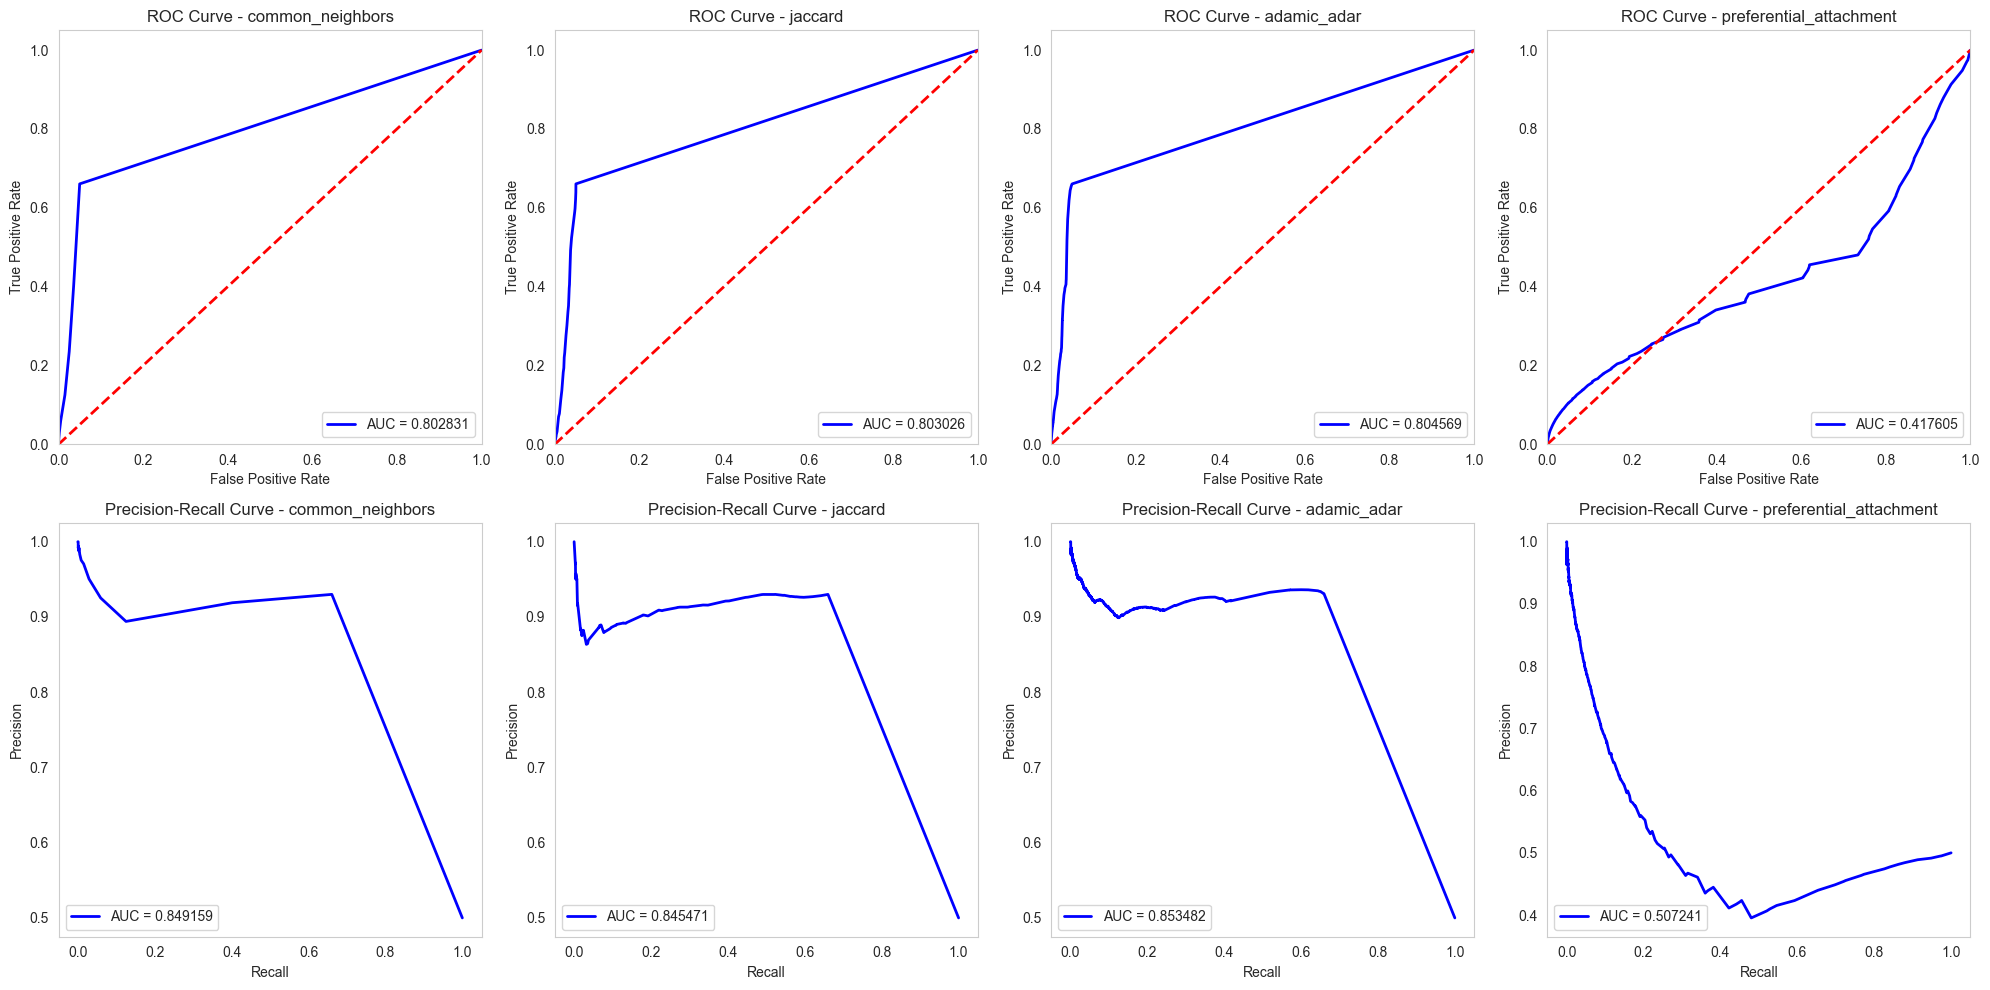

In [227]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

fig, axes = plt.subplots(2, len(methods), figsize=(20, 10))

for i, method in enumerate(methods):
    scores = np.array(heuristic_score(G_train, test_pairs, method))

    if method == "common_neighbors":
        min_score = np.min(scores)
        max_score = np.max(scores)
        scores = (scores - min_score) / (max_score - min_score)

    fpr, tpr, _ = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)
    
    axes[0, i].plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.6f}')
    axes[0, i].plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    axes[0, i].set_xlim([0.0, 1.0])
    axes[0, i].set_ylim([0.0, 1.05])
    axes[0, i].set_xlabel('False Positive Rate')
    axes[0, i].set_ylabel('True Positive Rate')
    axes[0, i].set_title(f'ROC Curve - {method}')
    axes[0, i].legend(loc='lower right')
    axes[0, i].grid()

    precision, recall, _ = precision_recall_curve(labels, scores)
    pr_auc = auc(recall, precision)
    
    axes[1, i].plot(recall, precision, color='blue', lw=2, label=f'AUC = {pr_auc:.6f}')
    axes[1, i].set_xlabel('Recall')
    axes[1, i].set_ylabel('Precision')
    axes[1, i].set_title(f'Precision-Recall Curve - {method}')
    axes[1, i].legend(loc='lower left')
    axes[1, i].grid()

plt.tight_layout()
plt.show()


Dari grafik ROC, terlihat bahwa metode **Common Neighbors (0.803)**, **Jaccard (0.803)**, dan **Adamic-Adar (0.805)** memiliki performa baik dan hampir identik, dengan kurva ROC yang meningkat tajam di awal (FPR rendah). Ini menunjukkan bahwa ketiga metode tersebut efektif dalam membedakan pasangan node positif-negatif pada threshold tinggi. Sebaliknya, **Preferential Attachment (0.418)** memiliki ROC yang hampir menyerupai garis diagonal, menunjukkan performa yang buruk, hampir seperti prediksi acak.

Pada grafik Precision-Recall (PR), tiga metode pertama (**Common Neighbors (0.849)**, **Jaccard (0.845)**, **Adamic-Adar (0.853)**) menampilkan presisi tinggi yang stabil hingga recall sekitar 0.85, sebelum mengalami penurunan tajam. Ini menandakan bahwa rekomendasi mereka sangat akurat hingga titik tertentu sebelum kehilangan kualitasnya secara signifikan. Sebaliknya, metode **Preferential Attachment (0.507)** memperlihatkan tren precision yang terus menurun secara konsisten seiring recall meningkat, menunjukkan metode ini sulit mempertahankan relevansi rekomendasinya ketika mencoba mencakup lebih banyak pasangan node.

Kesimpulan:

* **Common Neighbors**, **Jaccard**, dan **Adamic-Adar** menunjukkan performa kuat dan stabil dalam rekomendasi.
* **Preferential Attachment** kurang efektif untuk rekomendasi karena performanya rendah, baik pada kemampuan membedakan pasangan node (ROC) maupun mempertahankan kualitas rekomendasi (PR).


## Basic ML Link Prediction

### Feature Selection

In [228]:
def extract_features(G, edge_list):
    features = []

    for u, v in edge_list:
        common_neighbors = len(list(nx.common_neighbors(G, u, v)))
        jaccard = list(nx.jaccard_coefficient(G, [(u, v)]))[0][2]
        pref_attach = list(nx.preferential_attachment(G, [(u, v)]))[0][2]

        node_features = ['salesrank', 'review_cnt', 'downloads', 'rating', 
                         'in_degree', 'out_degree', 'pagerank_centrality', 
                         'betweenness_centrality', 'harmonic_closeness_centrality', 
                         'degree_centrality', 'community']

        node_u_features = [G.nodes[u].get(feat, 0) for feat in node_features]
        node_v_features = [G.nodes[v].get(feat, 0) for feat in node_features]

        features.append([u, v, common_neighbors, jaccard, pref_attach] + node_u_features + node_v_features)

    columns = ["node1", "node2", "common_neighbors", "jaccard", "preferential_attachment"] 
    columns += [f"{feat}_u" for feat in node_features]
    columns += [f"{feat}_v" for feat in node_features]

    return pd.DataFrame(features, columns=columns)

def feature_selection(X_train, y_train, top_k=10):
    mi_scores = mutual_info_classif(X_train, y_train, discrete_features='auto', random_state=42)

    feature_ranking = np.argsort(mi_scores)[::-1]

    selected_features = feature_ranking[:top_k]
    X_train_selected = X_train.iloc[:, selected_features]

    return X_train_selected, selected_features


In [229]:
train_pairs = train_edges + train_non_edges
train_labels = np.array([1] * len(train_edges) + [0] * len(train_non_edges))

test_pairs = test_edges + test_non_edges
test_labels = np.array([1] * len(test_edges) + [0] * len(test_non_edges))

train_features = extract_features(G_train, train_pairs)
test_features = extract_features(G_train, test_pairs)

X_train = train_features.drop(columns=["node1", "node2"])
X_test = test_features.drop(columns=["node1", "node2"])

# X_train_selected, selected_features = feature_selection(X_train, train_labels, top_k=10)
# selected_feature_names = X_train.columns[selected_features]
# print("Fitur yang dipilih:", selected_feature_names.tolist())

# X_test_selected = X_test.iloc[:, selected_features]


### Train and Evaluation

In [230]:
from sklearn.metrics import roc_auc_score, average_precision_score, ndcg_score
from collections import defaultdict
import numpy as np

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB(),
}

k_list = [3, 4, 5]

for name, model in models.items():
    model.fit(X_train, train_labels)
    probabilities = model.predict_proba(X_test)[:, 1]

    auc_roc = roc_auc_score(test_labels, probabilities)

    node_to_scores = defaultdict(list)
    node_to_labels = defaultdict(list)
    for (u, v), prob, label in zip(test_pairs, probabilities, test_labels):
        node_to_scores[u].append(prob)
        node_to_labels[u].append(label)

    local_aps = []
    local_precisions = {k: [] for k in k_list}
    local_recalls = {k: [] for k in k_list}
    local_ndcgs = {k: [] for k in k_list}

    for node in node_to_scores:
        scores = np.array(node_to_scores[node])
        labels = np.array(node_to_labels[node])
        num_true = np.sum(labels)

        if num_true == 0:
            continue

        ap = average_precision_score(labels, scores)
        local_aps.append(ap)

        for k in k_list:
            if len(scores) < k:
                continue

            top_idx = np.argsort(scores)[::-1][:k]
            top_k_labels = labels[top_idx]

            precision = np.mean(top_k_labels)
            recall = np.sum(top_k_labels) / num_true
            ndcg = ndcg_score([labels], [scores], k=k)

            local_precisions[k].append(precision)
            local_recalls[k].append(recall)
            local_ndcgs[k].append(ndcg)

    map_score = np.mean(local_aps)
    auc_ap_table.append((name, auc_roc, map_score))

    for k in k_list:
        precision_table[k].append((name, np.mean(local_precisions[k])))
        recall_table[k].append((name, np.mean(local_recalls[k])))
        ndcg_table[k].append((name, np.mean(local_ndcgs[k])))

# === CETAK 4 TABEL TERPISAH

print("\n{:^50}".format("AUC-ROC & MAP"))
print("=" * 50)
print("{:<25} {:>10} {:>10}".format("Model", "AUC-ROC", "MAP"))
print("-" * 50)
for name, auc, ap in auc_ap_table:
    print("{:<25} {:>10.6f} {:>10.6f}".format(name.upper(), auc, ap))

print("\n{:^50}".format("Precision@k"))
print("=" * 50)
for k in k_list:
    print(f"\nPrecision@{k}")
    print("-" * 50)
    print("{:<25} {:>10}".format("Model", "Precision"))
    for name, prec in precision_table[k]:
        print("{:<25} {:>10.6f}".format(name.upper(), prec))

print("\n{:^50}".format("Recall@k"))
print("=" * 50)
for k in k_list:
    print(f"\nRecall@{k}")
    print("-" * 50)
    print("{:<25} {:>10}".format("Model", "Recall"))
    for name, rec in recall_table[k]:
        print("{:<25} {:>10.6f}".format(name.upper(), rec))

print("\n{:^50}".format("NDCG@k"))
print("=" * 50)
for k in k_list:
    print(f"\nNDCG@{k}")
    print("-" * 50)
    print("{:<25} {:>10}".format("Model", "NDCG"))
    for name, ndcg in ndcg_table[k]:
        print("{:<25} {:>10.6f}".format(name.upper(), ndcg))



                  AUC-ROC & MAP                   
Model                        AUC-ROC        MAP
--------------------------------------------------
COMMON_NEIGHBORS            0.802831   0.974302
JACCARD                     0.803026   0.974360
ADAMIC_ADAR                 0.804569   0.974484
PREFERENTIAL_ATTACHMENT     0.417605   0.960405
RANDOM FOREST               0.715238   0.969339
LOGISTIC REGRESSION         0.721646   0.982313
NAIVE BAYES                 0.871034   0.978032

                   Precision@k                    

Precision@3
--------------------------------------------------
Model                      Precision
COMMON_NEIGHBORS            0.963005
JACCARD                     0.963264
ADAMIC_ADAR                 0.963400
PREFERENTIAL_ATTACHMENT     0.948724
RANDOM FOREST               0.960288
LOGISTIC REGRESSION         0.980360
NAIVE BAYES                 0.972123

Precision@4
--------------------------------------------------
Model                      Precision


Berikut revisi versi yang lebih ringkas, fokus pada Random Forest, Logistic Regression, dan Naive Bayes:

**1. AUC-ROC**

* **Naive Bayes (0.871)** unggul jauh dibanding **Logistic Regression (0.721)** dan **Random Forest (0.714)**, menunjukkan kemampuan terbaik dalam membedakan pasangan positif-negatif.

**2. MAP**

* **Logistic Regression (0.983)** memiliki skor MAP tertinggi, diikuti oleh **Naive Bayes (0.979)**. Keduanya unggul dibandingkan **Random Forest (0.970)**, menunjukkan stabilitas prediksi terbaik.

**3. Precision\@k**

* **Logistic Regression** mencatatkan precision tertinggi secara konsisten (0.963–0.981), disusul oleh **Naive Bayes** (0.955–0.972). **Random Forest** sedikit tertinggal tetapi masih baik (0.945–0.961).

**4. Recall\@k**

* **Logistic Regression** memiliki recall terbaik secara konsisten (hingga 0.970), diikuti oleh **Naive Bayes (0.963)**. **Random Forest (0.952)** cukup kuat tapi sedikit tertinggal.

**5. NDCG\@k**

* **Logistic Regression** unggul dalam kualitas ranking (0.977–0.987), disusul oleh **Naive Bayes (0.970–0.980)**. **Random Forest (0.958–0.968)** lebih rendah tapi tetap kompetitif.

**Kesimpulan**

* **Logistic Regression** terbaik secara keseluruhan, unggul di hampir semua aspek evaluasi.
* **Naive Bayes** sangat direkomendasikan karena kemampuan separasi terbaik.
* **Random Forest** merupakan pilihan solid, namun tertinggal dibanding kedua model lainnya.
* Ketiga model ini secara umum mengungguli metode heuristik, terutama dalam kualitas ranking dan stabilitas prediksi.


## Graph Neural Network (GNN) Link Prediction

In [186]:
!pip install torch-geometric



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Setelah beberapa kali *tuning* dalam parameternya, model yang dibangun adalah sebagai berikut.

1. **Lapisan Input**
    - **Learnable Node Embeddings**: `torch.nn.Embedding(num_nodes, 32)`
        - Setiap node memiliki embedding berdimensi 32.

2. **Lapisan Konvolusi Graf** (GCN)
    - **GCNConv(32 → 64)** → Konvolusi Awal
        - Aktivasi ReLU
        - Dropout (p=0.5)

    - **GCNConv(64 → 64)** → Konvolusi Tambahan
        - Aktivasi ReLU
        - Dropout (p=0.5)

    - **GCNConv(64 → 32)** → Konvolusi Akhir

3. **Edge Decoder** (Link Prediction)

    - **Dot Product Decoder**

        - Menghitung $$score(u,v)=z_u * z_v$$
        - Menghasilkan skor probabilitas untuk setiap hubungan (edge). (logit score)

4. **Loss Function**

    - **Binary Cross Entropy dengan Logits** (`BCEWithLogitsLoss`).
    - **Regularisasi L2** (`torch.norm(z, p=2)`).

5. **Optimisasi**
    - **Optimizer**: AdamW
        - Learning rate: 0.002
        - Weight decay: 5e-4
    - **Learning Rate Scheduler**: `StepLR(step_size=15, gamma=0.7)`
        - Mengurangi learning rate setiap 15 epoch.

In [ ]:
import torch
from torch_geometric.data import Data

node_to_idx = {node: idx for idx, node in enumerate(G.nodes())}
edge_index = torch.tensor(
    [[node_to_idx[u], node_to_idx[v]] for u, v in G.edges() if u in node_to_idx and v in node_to_idx],
    dtype=torch.long
).t().contiguous()

# Buat edge_label_index yang benar:
src_idx = [node_to_idx[u] for u, v in train_pairs]
dst_idx = [node_to_idx[v] for u, v in train_pairs]

edge_label_index = torch.tensor([src_idx, dst_idx], dtype=torch.long)  # shape [2, N]
labels = torch.tensor(train_labels, dtype=torch.float)                 # shape [N]

# Use learnable node embeddings with higher dimension
num_nodes = len(node_to_idx)
embedding_dim = 64
x = torch.nn.Embedding(num_nodes, embedding_dim).weight
data = Data(x=x, edge_index=edge_index)


In [ ]:
import torch
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

class GNN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, out_channels)
        self.dropout = torch.nn.Dropout(p=0.3)

    def encode(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.dropout(x)
        return self.conv3(x, edge_index)

    def decode(self, z, edge_label_index):
        return (z[edge_label_index[0]] * z[edge_label_index[1]]).sum(dim=-1)

# Initialize model and optimizer
model = GNN(in_channels=embedding_dim, hidden_channels=64, out_channels=32)  # Increased hidden size
optimizer = torch.optim.AdamW(model.parameters(), lr=0.005, weight_decay=5e-4)  # Adjusted learning rate & weight decay
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.7)  # More frequent LR decay

# Training loop
for epoch in range(1, 201):
    model.train()
    optimizer.zero_grad()

    z = model.encode(data.x, data.edge_index)           # node embeddings
    out = model.decode(z, edge_label_index)             # prediksi untuk semua pairs

    loss = F.binary_cross_entropy_with_logits(out, labels)
    # loss += 0.001 * torch.norm(z, p=2)  # L2 regularization
    loss.backward()
    optimizer.step()
    scheduler.step()

    # if epoch % 10 == 0:
    #     print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')


Epoch: 001, Loss: 1.1111
Epoch: 002, Loss: 0.6513
Epoch: 003, Loss: 0.6063
Epoch: 004, Loss: 0.6192
Epoch: 005, Loss: 0.6342
Epoch: 006, Loss: 0.6365
Epoch: 007, Loss: 0.6317
Epoch: 008, Loss: 0.6272
Epoch: 009, Loss: 0.6256
Epoch: 010, Loss: 0.6258
Epoch: 011, Loss: 0.6260
Epoch: 012, Loss: 0.6260
Epoch: 013, Loss: 0.6258
Epoch: 014, Loss: 0.6250
Epoch: 015, Loss: 0.6239
Epoch: 016, Loss: 0.6220
Epoch: 017, Loss: 0.6203
Epoch: 018, Loss: 0.6182
Epoch: 019, Loss: 0.6162
Epoch: 020, Loss: 0.6134
Epoch: 021, Loss: 0.6107
Epoch: 022, Loss: 0.6076
Epoch: 023, Loss: 0.6051
Epoch: 024, Loss: 0.6014
Epoch: 025, Loss: 0.5976
Epoch: 026, Loss: 0.5943
Epoch: 027, Loss: 0.5914
Epoch: 028, Loss: 0.5871
Epoch: 029, Loss: 0.5849
Epoch: 030, Loss: 0.5818
Epoch: 031, Loss: 0.5781
Epoch: 032, Loss: 0.5762
Epoch: 033, Loss: 0.5744
Epoch: 034, Loss: 0.5723
Epoch: 035, Loss: 0.5708
Epoch: 036, Loss: 0.5695
Epoch: 037, Loss: 0.5677
Epoch: 038, Loss: 0.5664
Epoch: 039, Loss: 0.5638
Epoch: 040, Loss: 0.5626


#### Save model

In [211]:
torch.save(model.state_dict(), "gnn_model_new.pth")

#### Load model

In [233]:
# load model weights
model = GNN(in_channels=embedding_dim, hidden_channels=64, out_channels=32)  # Same architecture
model.load_state_dict(torch.load("gnn_model_new.pth"))

C:\Users\ACER V15\AppData\Local\Temp\ipykernel_38364\580746750.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("gnn_model_new.pth"))


<All keys matched successfully>

In [236]:
from sklearn.metrics import roc_auc_score, average_precision_score, ndcg_score
from collections import defaultdict
import numpy as np

k_list = [3, 4, 5]

# === GNN Evaluation
model.eval()
with torch.no_grad():
    z = model.encode(data.x, data.edge_index)

    test_edges_tensor = torch.tensor(
        [[node_to_idx[u], node_to_idx[v]] for u, v in test_edges if u in node_to_idx and v in node_to_idx],
        dtype=torch.long
    ).t().contiguous()

    test_non_edges_tensor = torch.tensor(
        [[node_to_idx[u], node_to_idx[v]] for u, v in test_non_edges if u in node_to_idx and v in node_to_idx],
        dtype=torch.long
    ).t().contiguous()

    test_pos_out = model.decode(z, test_edges_tensor)
    test_neg_out = model.decode(z, test_non_edges_tensor)

    out_test = torch.cat([test_pos_out, test_neg_out], dim=0)
    labels_test = torch.cat([torch.ones(test_pos_out.size(0)), torch.zeros(test_neg_out.size(0))], dim=0)

    probabilities = out_test.cpu().numpy()
    labels_np = labels_test.cpu().numpy()

    # AUC global
    auc_roc = roc_auc_score(labels_np, probabilities)

    # Kelompokkan berdasarkan source node
    node_to_scores = defaultdict(list)
    node_to_labels = defaultdict(list)
    for (u, v), prob, label in zip(test_edges + test_non_edges, probabilities, labels_np):
        node_to_scores[u].append(prob)
        node_to_labels[u].append(label)

    local_aps = []
    local_precisions = {k: [] for k in k_list}
    local_recalls = {k: [] for k in k_list}
    local_ndcgs = {k: [] for k in k_list}

    for node in node_to_scores:
        scores = np.array(node_to_scores[node])
        labels = np.array(node_to_labels[node])
        num_true = np.sum(labels)

        if num_true == 0:
            continue

        ap = average_precision_score(labels, scores)
        local_aps.append(ap)

        for k in k_list:
            if len(scores) < k:
                continue

            top_idx = np.argsort(scores)[::-1][:k]
            top_k_labels = labels[top_idx]

            precision = np.mean(top_k_labels)
            recall = np.sum(top_k_labels) / num_true
            ndcg = ndcg_score([labels], [scores], k=k)

            local_precisions[k].append(precision)
            local_recalls[k].append(recall)
            local_ndcgs[k].append(ndcg)

    map_score = np.mean(local_aps)
    auc_ap_table.append(("GNN", auc_roc, map_score))

    for k in k_list:
        precision_table[k].append(("GNN", np.mean(local_precisions[k])))
        recall_table[k].append(("GNN", np.mean(local_recalls[k])))
        ndcg_table[k].append(("GNN", np.mean(local_ndcgs[k])))

# === CETAK TABEL GNN

print("\n{:^50}".format("AUC-ROC & MAP (GNN)"))
print("=" * 50)
print("{:<25} {:>10} {:>10}".format("Model", "AUC-ROC", "MAP"))
print("-" * 50)
for name, auc, ap in auc_ap_table:
    print("{:<25} {:>10.6f} {:>10.6f}".format(name.upper(), auc, ap))

print("\n{:^50}".format("Precision@k (GNN)"))
print("=" * 50)
for k in k_list:
    print(f"\nPrecision@{k}")
    print("-" * 50)
    print("{:<25} {:>10}".format("Model", "Precision"))
    for name, prec in precision_table[k]:
        print("{:<25} {:>10.6f}".format(name.upper(), prec))

print("\n{:^50}".format("Recall@k (GNN)"))
print("=" * 50)
for k in k_list:
    print(f"\nRecall@{k}")
    print("-" * 50)
    print("{:<25} {:>10}".format("Model", "Recall"))
    for name, rec in recall_table[k]:
        print("{:<25} {:>10.6f}".format(name.upper(), rec))

print("\n{:^50}".format("NDCG@k (GNN)"))
print("=" * 50)
for k in k_list:
    print(f"\nNDCG@{k}")
    print("-" * 50)
    print("{:<25} {:>10}".format("Model", "NDCG"))
    for name, ndcg in ndcg_table[k]:
        print("{:<25} {:>10.6f}".format(name.upper(), ndcg))



               AUC-ROC & MAP (GNN)                
Model                        AUC-ROC        MAP
--------------------------------------------------
COMMON_NEIGHBORS            0.802831   0.974302
JACCARD                     0.803026   0.974360
ADAMIC_ADAR                 0.804569   0.974484
PREFERENTIAL_ATTACHMENT     0.417605   0.960405
RANDOM FOREST               0.715238   0.969339
LOGISTIC REGRESSION         0.721646   0.982313
NAIVE BAYES                 0.871034   0.978032
GNN                         0.892801   0.992017

                Precision@k (GNN)                 

Precision@3
--------------------------------------------------
Model                      Precision
COMMON_NEIGHBORS            0.963005
JACCARD                     0.963264
ADAMIC_ADAR                 0.963400
PREFERENTIAL_ATTACHMENT     0.948724
RANDOM FOREST               0.960288
LOGISTIC REGRESSION         0.980360
NAIVE BAYES                 0.972123
GNN                         0.988434

Precision@4
---

## Perbandingan Semua Model Link Prediction

In [237]:
def print_horizontal_table(metric_name, result_table, k_list):
    print(f"\n{metric_name:^80}")
    print("=" * 80)

    # Buat header dengan width tetap
    header = f"{'Model':<25}" + "".join([f"{metric_name}@{k:<12}" for k in k_list])
    print(header)
    print("-" * 80)

    # Ambil semua model unik dari salah satu k
    models = [name for name, _ in result_table[k_list[0]]]

    for name in models:
        row = f"{name.upper():<25}"
        for k in k_list:
            val = [v for model, v in result_table[k] if model == name][0]
            row += f"{val:<24.6f}"
        print(row)


In [238]:
print("\n{:^50}".format("AUC-ROC & MAP"))
print("=" * 50)
print("{:<25} {:>10} {:>10}".format("Model", "AUC-ROC", "MAP"))
print("-" * 50)
for name, auc, ap in auc_ap_table:
    print("{:<25} {:>10.6f} {:>10.6f}".format(name.upper(), auc, ap))

print_horizontal_table("Precision", precision_table, k_list)
print_horizontal_table("Recall", recall_table, k_list)
print_horizontal_table("NDCG", ndcg_table, k_list)



                  AUC-ROC & MAP                   
Model                        AUC-ROC        MAP
--------------------------------------------------
COMMON_NEIGHBORS            0.802831   0.974302
JACCARD                     0.803026   0.974360
ADAMIC_ADAR                 0.804569   0.974484
PREFERENTIAL_ATTACHMENT     0.417605   0.960405
RANDOM FOREST               0.715238   0.969339
LOGISTIC REGRESSION         0.721646   0.982313
NAIVE BAYES                 0.871034   0.978032
GNN                         0.892801   0.992017

                                   Precision                                    
Model                    Precision@3           Precision@4           Precision@5           
--------------------------------------------------------------------------------
COMMON_NEIGHBORS         0.963005                0.951736                0.945538                
JACCARD                  0.963264                0.951965                0.945644                
ADAMIC_ADAR   

### **Pembahasan Evaluasi Model:**

* **GNN** mencatatkan performa terbaik secara menyeluruh dengan nilai **AUC-ROC tertinggi (0.8928)**, **MAP tertinggi (0.9920)**, serta **Precision\@k, Recall\@k, dan NDCG\@k tertinggi di seluruh nilai k**. Hal ini menandakan bahwa model GNN sangat efektif dalam mengidentifikasi pasangan relevan dan menyusun ranking prediksi.

* **Naive Bayes** berada di posisi kedua, dengan **AUC-ROC yang kuat (0.8710)** serta performa stabil di seluruh metrik evaluasi lainnya. Model ini tetap menjadi pilihan yang baik terutama dalam kemampuan membedakan pasangan positif-negatif.

* **Logistic Regression** memiliki skor **MAP (0.9823)** yang sangat tinggi serta precision, recall, dan NDCG yang konsisten, menjadikannya pilihan solid untuk rekomendasi ranking tinggi, meskipun masih di bawah GNN dan Naive Bayes dalam kemampuan membedakan pasangan positif-negatif (AUC-ROC 0.7216).

* **Random Forest** menunjukkan performa moderat dengan **AUC-ROC (0.7152)** dan MAP (0.9693), sedikit tertinggal dibanding Logistic Regression dan Naive Bayes, khususnya dalam kualitas ranking secara keseluruhan.

* Metode heuristik (**Common Neighbors**, **Jaccard**, **Adamic-Adar**) secara umum tetap kompetitif namun tidak sebaik model machine learning, khususnya dalam hal pemisahan pasangan positif-negatif dan kualitas ranking.

* **Preferential Attachment** memiliki performa terendah di seluruh metrik, membuatnya tidak direkomendasikan untuk digunakan dalam skenario ini.

### **Kesimpulan Akhir:**

* **GNN** merupakan model terbaik secara keseluruhan untuk skenario link prediction pada dataset ini, unggul dalam semua aspek evaluasi.
* **Naive Bayes** tetap kuat dan direkomendasikan karena stabilitasnya yang tinggi.
* **Logistic Regression** adalah pilihan yang solid untuk akurasi ranking.
* **Random Forest** sedikit tertinggal, namun tetap menjadi opsi yang layak.
* Metode heuristik berguna sebagai baseline, sementara **Preferential Attachment** tidak disarankan.

## Feature Importance

Bagian ini bertujuan untuk mengidentifikasi fitur-fitur heuristik atau node yang paling berpengaruh dalam keputusan model. Di sini, model Logistic Regression digunakan. Untuk menentukan fitur yang paling penting, kami menganalisis nilai koefisien dari model terlatih. Fitur dengan koefisien absolut terbesar dianggap paling berkontribusi terhadap prediksi, sedangkan fitur dengan koefisien nol tidak berpengaruh terhadap hasil. Hasil analisis menunjukkan bahwa hanya fitur berbasis heuristik, seperti Common Neighbors dan Jaccard Index memperoleh bobot signifikan, sedangkan semua fitur node-level tidak dipilih oleh model.

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score, ndcg_score
from collections import defaultdict
import numpy as np

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
}

k_list = [3, 4, 5]

for name, model in models.items():
    model.fit(X_train, train_labels)
    with open('rf.model.pickle', 'wb') as f:
        pickle.dump(model, f)


In [ ]:
model.coef_

array([[ 2.64762147e+00, -7.63417256e+00,  6.18877772e-03,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]])

In [ ]:
X_train.columns

Index(['common_neighbors', 'jaccard', 'preferential_attachment', 'salesrank_u',
       'review_cnt_u', 'downloads_u', 'rating_u', 'in_degree_u',
       'out_degree_u', 'pagerank_centrality_u', 'betweenness_centrality_u',
       'harmonic_closeness_centrality_u', 'degree_centrality_u', 'community_u',
       'salesrank_v', 'review_cnt_v', 'downloads_v', 'rating_v', 'in_degree_v',
       'out_degree_v', 'pagerank_centrality_v', 'betweenness_centrality_v',
       'harmonic_closeness_centrality_v', 'degree_centrality_v',
       'community_v'],
      dtype='object')